In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data 
data = pd.read_csv(r"D:\DATA SCIENCE\Cardiotocographic.csv")
data.head()
#1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
#2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
#3.	FM - May indicate "Fetal Movements" detected by the monitor.
#4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
#5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
#6.	DS - May represent "Decelerations Short" or decelerations of brief duration.
#7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
#8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
#9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
#10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
#11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [3]:
data.info()
# Explains that data set has missing value as non-null count is differet for all the columns and all the data is float(numeric).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
data.describe(include = 'all')
#This operation ensures that there no missing values as count for all the columns are different and we can check for standard deviation and different quartiles.

LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000142     0.000840    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2105.000000  2105.000000  2105.000000  2105.000000  
mean      8.284887    70.429260     0.316371     1.304507  
std       7.772858    42.931822     0.645622     0.644619  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.000000     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

In [5]:
#print the duplicated rows
data[data.duplicated(keep=False)]

LB        AC   FM        UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
1113  122.0  0.000000  0.0  0.000000  0.0  0.0  0.0  19.0   1.9   0.0  15.1   
1115  122.0  0.000000  0.0  0.000000  0.0  0.0  0.0  19.0   1.9   0.0  15.1   
1457  148.0  0.004717  0.0  0.002358  0.0  0.0  0.0  40.0   0.9   0.0  10.6   
1458  148.0  0.004717  0.0  0.002358  0.0  0.0  0.0  40.0   0.9   0.0  10.6   

      Width  Tendency  NSP  
1113   39.0       0.0  1.0  
1115   39.0       0.0  1.0  
1457   35.0       0.0  1.0  
1458   35.0       0.0  1.0

In [6]:
#keeping only first instance and removing the remaining duplicate instance
data1 = data.drop_duplicates(keep = 'first')

In [7]:
#checking again for duplicate rows
data1[data1.duplicated(keep = False)]
# Thus, no duplicate rows are present in the data

Empty DataFrame
Columns: [LB, AC, FM, UC, DL, DS, DP, ASTV, MSTV, ALTV, MLTV, Width, Tendency, NSP]
Index: []

In [8]:
 #checking for missing values
data1[data1.isnull().any(axis=1)]

LB        AC        FM        UC        DL  DS  DP       ASTV      MSTV  \
50   NaN       NaN  0.000000  0.008086  0.000000 NaN NaN  29.000000  1.300000   
116  NaN  0.038567  0.000000  0.006993  0.002331 NaN NaN  26.000000  4.300000   
126  NaN       NaN  0.000000  0.004380  0.000000 NaN NaN  69.000000  0.300000   
201  NaN       NaN  0.016393  0.000000  0.000000 NaN NaN  56.000000  0.500000   
566  NaN       NaN  0.000000  0.004115  0.005487 NaN NaN  43.000000  2.500000   
574  NaN       NaN  0.000000  0.002611  0.002611 NaN NaN  34.000000  4.900000   
603  NaN       NaN  0.006519  0.001304  0.001304 NaN NaN  73.000000  0.700000   
935  NaN       NaN  0.000000  0.005495  0.001374 NaN NaN  30.000000  1.251793   
936  NaN       NaN  0.000000  0.007802  0.000000 NaN NaN  33.000000  1.000000   
1013 NaN       NaN  0.000000  0.003861  0.000000 NaN NaN  34.000000  1.000000   
1205 NaN       NaN -0.000129  0.006424  0.000000 NaN NaN  63.000000  0.500000   
1332 NaN       NaN  0.010204  0.002551  0.005102 NaN NaN  27.000000  1.900000   
1347 NaN       NaN  0.018519  0.003466  0.002315 NaN NaN  30.000000  2.100000   
1430 NaN       NaN -0.001442  0.005038  0.000000 NaN NaN  42.000000  0.700000   
1636 NaN       NaN  0.005650  0.004708  0.001883 NaN NaN  51.000000  2.800000   
1645 NaN       NaN  0.000000  0.005015  0.005015 NaN NaN  51.000000  1.500000   
1792 NaN       NaN  0.001029  0.003086  0.011317 NaN NaN  67.000000  2.100000   
1854 NaN       NaN  0.000000  0.006369  0.000796 NaN NaN  51.000000  1.200000   
1863 NaN       NaN  0.000000  0.003257  0.000000 NaN NaN  51.000000  1.000000   
1928 NaN       NaN  0.002976  0.004960  0.002976 NaN NaN  63.000000  1.700000   
1934 NaN       NaN  0.003049  0.009146  0.003811 NaN NaN  61.926728  2.500000   

           ALTV  MLTV  Width  Tendency  NSP  
50     0.000000   NaN    NaN       NaN  NaN  
116    0.532872   NaN    NaN       NaN  NaN  
126   21.000000   NaN    NaN       NaN  NaN  
201   12.000000   NaN    NaN       NaN  NaN  
566    0.000000   NaN    NaN       NaN  NaN  
574    0.000000   NaN    NaN       NaN  NaN  
603    0.000000   NaN    NaN       NaN  NaN  
935    0.000000   NaN    NaN       NaN  NaN  
936    0.000000   NaN    NaN       NaN  NaN  
1013   0.000000   NaN    NaN       NaN  NaN  
1205  35.000000   NaN    NaN       NaN  NaN  
1332   0.000000   NaN    NaN       NaN  NaN  
1347   0.000000   NaN    NaN       NaN  NaN  
1430   0.000000   NaN    NaN       NaN  NaN  
1636   0.000000   NaN    NaN       NaN  NaN  
1645   0.000000   NaN    NaN       NaN  NaN  
1792   0.000000   NaN    NaN       NaN  NaN  
1854   0.000000   NaN    NaN       NaN  NaN  
1863   0.000000   NaN    NaN       NaN  NaN  
1928   5.000000   NaN    NaN       NaN  NaN  
1934   0.000000   NaN    NaN       NaN  NaN

In [9]:
#Getting the count of null values in each column
data1.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [10]:
# we will replace the null value in the each column with the median as median is insensitive to outliers or the extreme values.
median = data1['LB'].median()
print (median)

133.0


In [11]:
data1['LB']=data1['LB'].fillna(median)

C:\Users\singh\AppData\Local\Temp\ipykernel_16076\329313595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['LB']=data1['LB'].fillna(median)


In [12]:
data1.isnull().sum()
#sucessfully we have added the median value to LB column , I will similarly replace the median value in other columns.

LB           0
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [13]:
# For AC column
median1 = data1['AC'].median()
data1['AC']=data1['AC'].fillna(median1)

# For DS column

median2 = data1['DS'].median()
data1['DS']=data1['DS'].fillna(median2)

# For DP column

median3 = data1['DP'].median()
data1['DP']=data1['DP'].fillna(median3)

# For MLTV column

median4 = data1['MLTV'].median()
data1['MLTV']=data1['MLTV'].fillna(median4)

#For Width column

median5 = data1['Width'].median()
data1['Width']=data1['Width'].fillna(median5)

# For Tendency coulmn

median6 = data1['Tendency'].median()
data1['Tendency']=data1['Tendency'].fillna(median6)

# For NSP column

median7 = data1['NSP'].median()
data1['NSP']=data1['NSP'].fillna(median7)

C:\Users\singh\AppData\Local\Temp\ipykernel_16076\14173083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['AC']=data1['AC'].fillna(median1)
C:\Users\singh\AppData\Local\Temp\ipykernel_16076\14173083.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['DS']=data1['DS'].fillna(median2)
C:\Users\singh\AppData\Local\Temp\ipykernel_16076\14173083.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [14]:
#checking for null values
data1.isnull().sum()
# No null values are present in the data set

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [15]:
data1.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

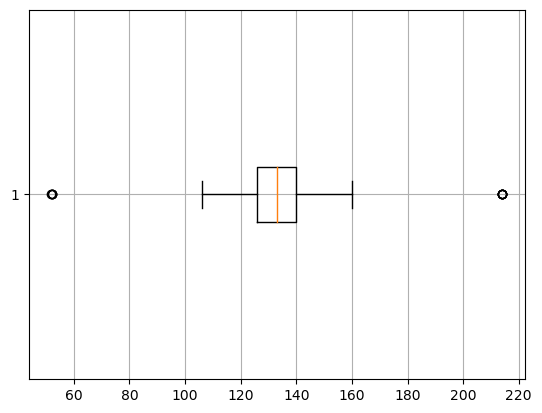

In [16]:
#checking for Outliers in the LB cloumn using various technique like histogram and boxplots
plt.grid()
boxlb = plt.boxplot(data1['LB'], vert=False)
#Box plot shows that outliers are present in the LB column.

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


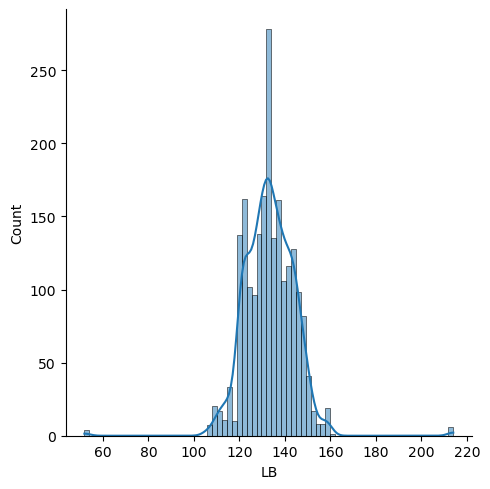

In [17]:
#Visulaizing Outliers for LB column using Histogram
sns.displot(data['LB'], kde=True)
plt.show()
#The bars away from the cluster dataset in the centre on the both sides represent outliers.-

In [18]:
# As the LB graph is more or less like normal distribution we will use z-score method of outlier detection and then we will cap the outliers.
#find mean , standard deviation, minimum and maximum value in the LB column.
print("Mean value of LB",data1['LB'].mean())
print("Std value of LB",data1['LB'].std())
print("Min value of LB",data1['LB'].min())
print("Max value of LB",data1['LB'].max())

Mean value of LB 133.33864149592708
Std value of LB 11.21244739992819
Min value of LB 51.84248683343552
Max value of LB 214.0


In [19]:
#Finding the boundary values
print("Highest allowed",data1['LB'].mean()+3*data1['LB'].std())
print("Lowest allowed",data1['LB'].mean()-3*data1['LB'].std())

Highest allowed 166.97598369571165
Lowest allowed 99.70129929614251


In [20]:
#Finding outliers
data1[(data1['LB']>166.97598369571165) | (data1['LB']< 99.70129929614251)]
#This shows that there are data points beyond allowed highest and lowest value.Now we will proceed with further step of capping.

LB        AC        FM        UC        DL        DS        DP  \
134    52.000000  0.001590  0.000000  0.029851  0.000000  0.000000  0.000003   
411   214.000000  0.000000  0.000000  0.001595  0.001595  0.000000  0.000000   
610   214.000000  0.002469  0.002469  0.002469  0.000000  0.000004  0.000000   
612   214.000000  0.005181  0.012953  0.002591  0.000000  0.000000  0.000000   
785    52.000000  0.000834  0.013344  0.000000  0.000000  0.000000  0.000000   
1027   51.842487  0.009485  0.000000  0.005420  0.002710  0.000005  0.000000   
1103  214.000000  0.006972  0.000000  0.002960  0.000000  0.000000  0.000000   
1406  214.000000  0.005068  0.000000  0.001689  0.000000  0.000000  0.000000   
1504  214.000000  0.006189  0.000000  0.006189  0.000000  0.000000  0.000000   
1834   52.188547  0.000000  0.001043  0.003128  0.007299  0.000000  0.000000   

           ASTV      MSTV  ALTV  MLTV      Width  Tendency     NSP  
134   58.000000  0.500000   0.0   7.9   44.00000       1.0  1.0000  
411   71.000000  0.300000  17.0   5.8   15.00000       0.0  2.0000  
610   35.000000  1.798149   0.0  24.7  118.00000       1.0  1.0000  
612   39.442226  1.600000   0.0  10.0  136.00000       0.0  0.9912  
785   53.000000  0.700000   8.0  12.0   77.00000       1.0  1.0000  
1027 -63.000000  2.500000   0.0   3.9   98.00000       0.0  1.0000  
1103  19.000000  2.300000   0.0  12.1   53.00000       0.0  1.0000  
1406  46.000000  0.800000   0.0   8.6   67.00000       1.0  1.0000  
1504  38.000000  1.000000   0.0   8.1   53.00000       0.0  1.0000  
1834  61.000000  1.400000   0.0  10.0  105.40169       1.0  1.0000

In [21]:
#Capping outliers 
upper_limit_LB = data1['LB'].mean() + 3 * data1['LB'].std()
lower_limit_LB = data1['LB'].mean() - 3 * data1['LB'].std()

data1['LB'] = np.where(
    data1['LB'] > upper_limit_LB, upper_limit_LB,
    np.where(
        data1['LB'] < lower_limit_LB, lower_limit_LB,
        data1['LB']  # Use the original data from 'LB' column
    )
)

C:\Users\singh\AppData\Local\Temp\ipykernel_16076\1930913878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['LB'] = np.where(


C:\Users\singh\AppData\Local\Temp\ipykernel_16076\3378300857.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['LB'])


<Axes: xlabel='LB', ylabel='Density'>

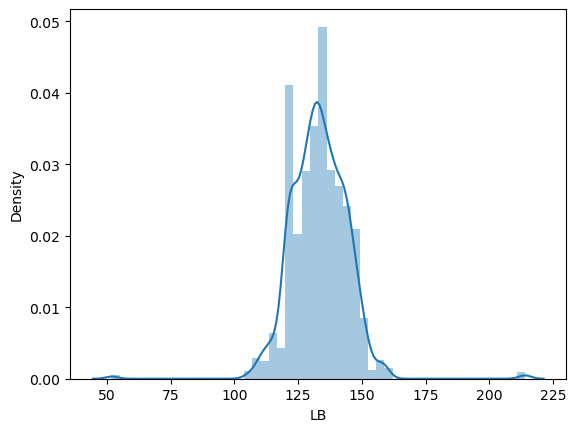

In [22]:
# Visualizing for outliers in LB column
sns.distplot(data['LB'])
# Clearly outliers has been capped

<Axes: >

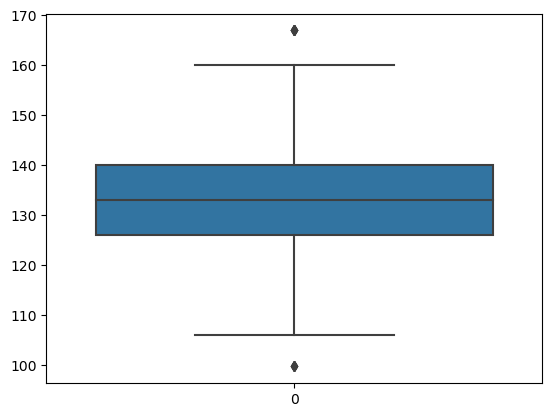

In [23]:
#checking with boxplot
sns.boxplot(data1['LB'])
#it may seems like outlier is present but these are based on maximum and minimum limit as per z-score. So, we can consider that there are no outliers in the LB column.

In [24]:
data1

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2124 rows x 14 columns]

C:\Users\singh\AppData\Local\Temp\ipykernel_16076\410727186.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['AC'])


<Axes: xlabel='AC', ylabel='Density'>

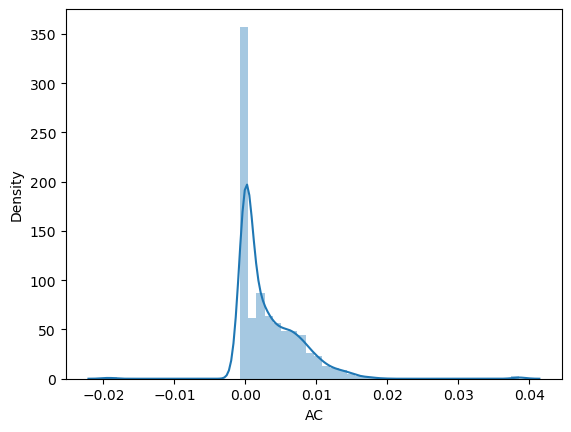

In [25]:
#checking for outliers in the AC column
sns.distplot(data1['AC'])


<Axes: xlabel='LB'>

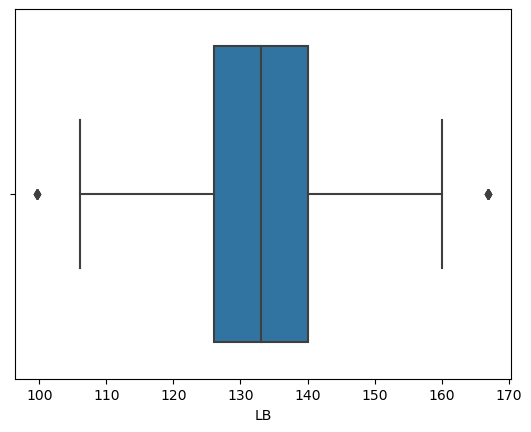

In [26]:
sns.boxplot(x = data1['LB'])

In [27]:
data1['LB'].skew()

0.03483181892718307

In [28]:
#As data is slightly skewed we will use IQR method for outlier detection and treating the outlier
#finding the IQR
percentile25_AC = data1['AC'].quantile(0.25)
percentile75_AC = data1['AC'].quantile(0.75)
iqr_AC = percentile75_AC - percentile25_AC

In [29]:
# Finding upper and lower limit 
upper_limit_AC = percentile75_AC + 1.5*iqr_AC
lower_limit_AC = percentile25_AC - 1.5*iqr_AC
print("Upper limit",upper_limit_AC)
print("Lower limit",lower_limit_AC)

Upper limit 0.01403017
Lower limit -0.008418102


In [30]:
#Finding outliers with upper limitt
data1[data1['AC']>upper_limit_AC]

LB        AC        FM        UC        DL        DS   DP       ASTV  \
8     122.0  0.038567  0.000000  0.001517  0.000000  0.000000  0.0  84.000000   
83    145.0  0.014706  0.008403  0.002101  0.000000  0.000000  0.0  43.000000   
85    145.0  0.014230  0.025873  0.001294  0.000000  0.000000  0.0  40.000000   
116   133.0  0.038567  0.000000  0.006993  0.002331  0.000000  0.0  26.000000   
181   138.0  0.017241  0.000000  0.005305  0.000000  0.000000  0.0  35.000000   
496   130.0  0.014178  0.091743  0.000938  0.000000  0.000000  0.0  32.000000   
497   130.0  0.015552  0.083981  0.001555 -0.000026  0.000000  0.0  34.000000   
498   130.0  0.015258  0.115023  0.000000  0.000000  0.000000  0.0  31.000000   
500   131.0  0.014178  0.015013  0.000834  0.000000  0.000000  0.0  29.000000   
501   131.0  0.014726  0.017403  0.001339  0.000000  0.000000  0.0  31.000000   
526   142.0  0.015013  0.062552  0.001668  0.000834  0.000000  0.0  36.000000   
527   142.0  0.014065  0.060478  0.002813  0.000000  0.000000  0.0  38.000000   
529   142.0  0.019284  0.085399  0.000000  0.000000  0.000000  0.0  32.000000   
530   142.0  0.015590  0.071269  0.000000  0.002227  0.000000  0.0  32.000000   
531   142.0  0.016423  0.060219  0.003650  0.000000  0.000000  0.0  38.000000   
552   136.0  0.015782  0.000000  0.004304  0.000000  0.000000  0.0  35.000000   
616   146.0  0.014806  0.025057  0.002278  0.000000  0.000000  0.0  41.000000   
626   132.0  0.038567  0.000000  0.000000  0.002217  0.000000  0.0  37.000000   
630   134.0  0.017391  0.002484  0.003727  0.000000  0.000000  0.0  48.000000   
1000  129.0  0.014907  0.000000  0.006211  0.000000  0.000000  0.0  22.000000   
1066  133.0  0.014303  0.000000  0.005959  0.000000 -0.000001  0.0  31.000000   
1093  122.0  0.015642  0.000000  0.001117  0.000000  0.000000  0.0  22.203272   
1094  122.0  0.017668  0.000000  0.001767  0.000000  0.000000  0.0  22.000000   
1096  123.0  0.017341  0.000000  0.001927  0.000000  0.000000  0.0  24.000000   
1231  126.0  0.038567  0.000000  0.004373  0.000000  0.000000  0.0  32.000000   
1248  112.0  0.017857  0.000000  0.007143  0.000000  0.000000  0.0  25.000000   
1311  125.0  0.014320  0.009547  0.004773  0.004773  0.000000  0.0  22.000000   
1312  125.0  0.015113  0.010076  0.005038  0.002519 -0.000003  0.0  22.255962   
1687  137.0  0.014400  0.000000  0.007200  0.003200  0.000000  0.0  53.000000   
1857  138.0  0.014068  0.000000  0.005862  0.000000  0.000000  0.0  51.000000   
1858  138.0  0.015907  0.000000  0.005302  0.000000  0.000000  0.0  51.000000   
1859  138.0  0.017073  0.000000  0.003659  0.000000  0.000000  0.0  51.000000   
1860  138.0  0.015166  0.000000  0.003791  0.000000  0.000000  0.0  51.000000   
1861  138.0  0.014444  0.000000  0.004444  0.000000  0.000000  0.0  51.000000   
1862  138.0  0.016000  0.000000  0.000000  0.000000  0.000000  0.0  51.000000   
1866  138.0  0.014842  0.000000  0.002783  0.000000  0.000000  0.0  50.000000   
1918  140.0  0.038567  0.000907  0.007253  0.004533  0.000000  0.0  64.000000   
2060  127.0  0.038567  0.000000  0.005663  0.000000  0.000000  0.0  61.924352   

           MSTV       ALTV      MLTV       Width  Tendency       NSP  
8      0.500000   5.000000  13.60000   68.000000  1.000000  3.000000  
83     1.500000   0.000000   0.00000  109.000000  1.000000  1.000000  
85     1.100000  -0.580260   1.20000  113.000000  1.000000  1.000000  
116    4.300000   0.532872   7.40000   67.486468  0.000000  1.000000  
181    5.300000   0.000000   4.50000  148.000000  1.000000  1.000000  
496    2.400000  -0.301201   9.50000  120.000000  1.000000  1.000000  
497    2.100000   0.000000   3.00000  132.000000  0.971151  1.000000  
498    2.600000   0.000000  14.00000  120.000000  1.000000  1.000000  
500    3.700000   0.000000   4.80000  120.000000  1.000000  1.003778  
501    3.200000   0.777728   7.10000  133.000000  1.000000  0.975440  
526    1.900000   0.000000   2.50000  148.000000  1.000000  1.000000

In [31]:
#Finding outliers with Lower limit
data1[data1['AC']<lower_limit_AC]

LB        AC        FM        UC        DL   DS        DP       ASTV  \
23    128.0 -0.019284  0.000000  0.000000  0.000000  0.0  0.000000  80.000000   
157   123.0 -0.019284  0.000000  0.006400  0.000000  0.0  0.000000  37.927549   
681   140.0 -0.019284  0.003191  0.004255  0.000000  0.0  0.000000  34.000000   
1752  134.0 -0.019284  0.001096  0.001096  0.003289  0.0  0.003289  61.000000   

      MSTV  ALTV  MLTV  Width  Tendency       NSP  
23     0.5   0.0   6.8   16.0   1.00000  3.000000  
157    0.9  13.0   8.0   24.0   0.00000  1.000000  
681    2.9   0.0  40.8  114.0   1.00000  0.984834  
1752   1.8   0.0   0.0  118.0  -1.00594  3.000000

In [32]:
# Capping the outliers in the AC column
data2 = data1.copy()
data2['AC'] = np.where(
    data1['AC'] > upper_limit_AC, upper_limit_AC,
    np.where(
        data2['AC'] < lower_limit_AC, lower_limit_AC,
        data2['AC']  # Use the original data from 'AC' column
    )
)

C:\Users\singh\AppData\Local\Temp\ipykernel_16076\1218974385.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['AC'])
C:\Users\singh\AppData\Local\Temp\ipykernel_16076\1218974385.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['AC'])


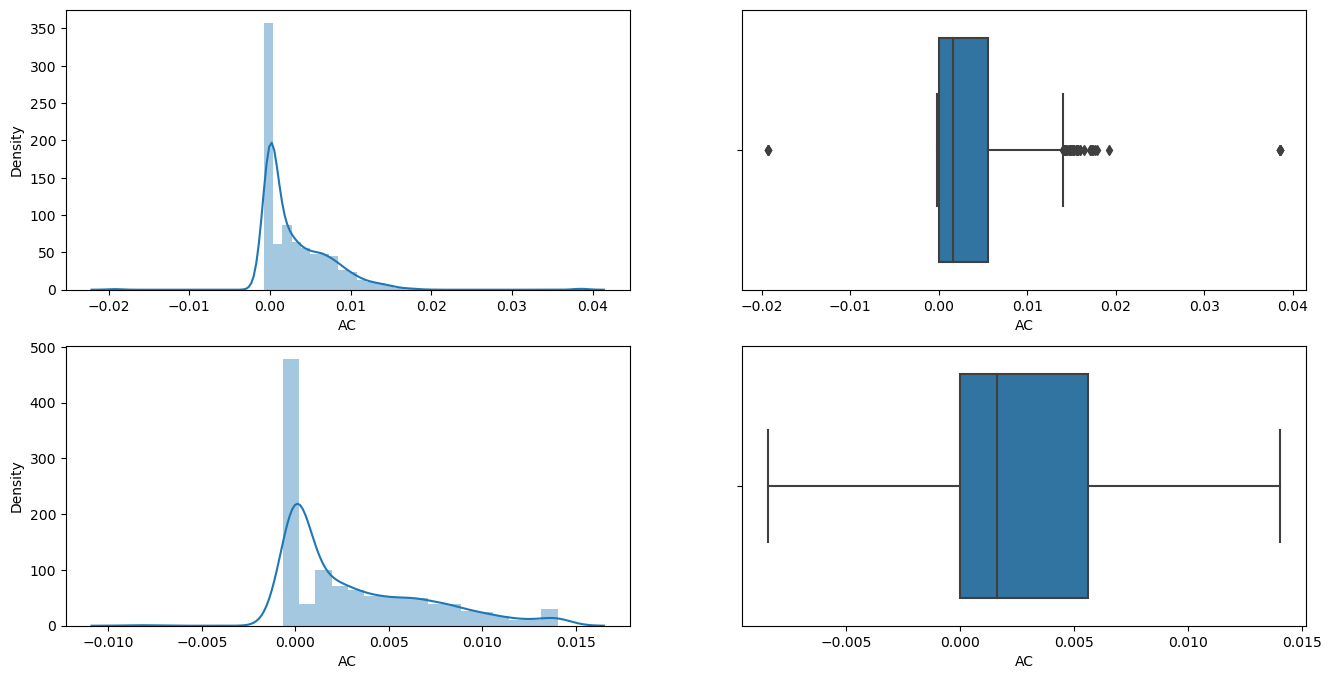

In [33]:
# Comapairing Data1 and Data2 AC column for changes in the outliers.
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(data1['AC'])

plt.subplot(2,2,2)
sns.boxplot(x = data1['AC'])

plt.subplot(2,2,3)
sns.distplot(data2['AC'])

plt.subplot(2,2,4)
sns.boxplot(x = data2['AC'])

plt.show()

#comparison clearly shows that outliers has been removed.

In [34]:
data2.head(4)

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
0  120.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   2.4   
1  132.0  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0  10.4   
2  133.0  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0  13.4   
3  134.0  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0  23.0   

   Width  Tendency  NSP  
0   64.0  0.999926  2.0  
1  130.0  0.000000  1.0  
2  130.0  0.000000  1.0  
3  117.0  1.000000  1.0

In [35]:
# Checking for outliers in the FM column
data2['FM'].describe()

count    2124.000000
mean        0.009904
std         0.067571
min        -0.480634
25%         0.000000
50%         0.000000
75%         0.002568
max         0.961268
Name: FM, dtype: float64

<Axes: xlabel='FM'>

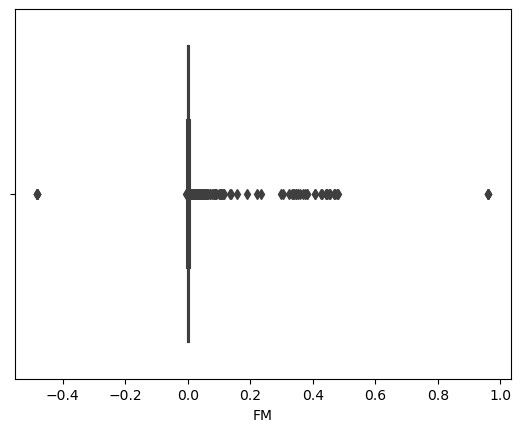

In [36]:
sns.boxplot(x = data2['FM'])

C:\Users\singh\AppData\Local\Temp\ipykernel_16076\1335004109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['FM'])


<Axes: xlabel='FM', ylabel='Density'>

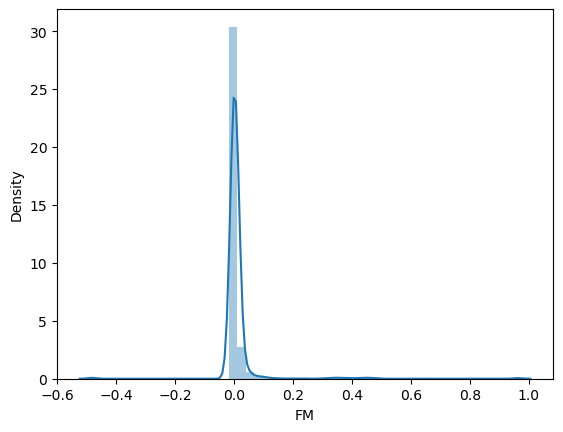

In [37]:
sns.distplot(data2['FM'])

In [38]:
#As this column contains high number of ouliers and as median is 0. This column is highly sensitive so we will use percentile method here.
# Detecting Outliers
upper_limit_FM = data2['FM'].quantile(0.95)
lower_limit_FM = data2['FM'].quantile(0.05)
print("lower limit",lower_limit_FM)
print("upper limit",upper_limit_FM)

lower limit 0.0
upper limit 0.029421976099999973


In [39]:
# Filtering outliers greater than upper limit
data2[(data2['FM']) >= 0.029421976099999973]

LB        AC        FM        UC        DL   DS        DP  ASTV  \
12    131.000000  0.005076  0.072335  0.007614  0.002538  0.0  0.000000  28.0   
13    131.000000  0.009077  0.222390  0.006051  0.001513  0.0  0.000000  28.0   
14    130.000000  0.005838  0.407840  0.004170  0.005004  0.0  0.000826  21.0   
15    130.000000  0.005571  0.380223  0.004178  0.004178  0.0  0.001393  19.0   
16    130.000000  0.006088  0.441400  0.004566  0.004566  0.0  0.000000  24.0   
...          ...       ...       ...       ...       ...  ...       ...   ...   
1618  142.000000  0.003175  0.050000  0.002381  0.005556  0.0  0.000794  66.0   
1619  142.000000  0.002787  0.048084  0.002787  0.006272  0.0  0.000697  66.0   
1620  142.000000  0.002469  0.054321  0.001235  0.007407  0.0  0.000000  64.0   
1621  142.920776  0.002110  0.051688  0.001055  0.008439  0.0  0.000000  64.0   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.000000  79.0   

          MSTV       ALTV  MLTV  Width  Tendency  NSP  
12    1.400000  -0.702936  12.9   66.0       1.0  1.0  
13    1.500000   0.000000   5.4   87.0       1.0  1.0  
14    2.300000   0.000000   7.9  107.0       0.0  1.0  
15    2.293400   0.000000   8.7  107.0       0.0  1.0  
16    2.100000   0.000000  10.9  125.0       1.0  1.0  
...        ...        ...   ...    ...       ...  ...  
1618  3.300000   0.000000   0.3  113.0       1.0  1.0  
1619  3.500000   0.000000   0.3  143.0       0.0  1.0  
1620  4.008749   0.000000   0.4  143.0       0.0  1.0  
1621  3.800000   0.000000   1.3  143.0       0.0  1.0  
2121  0.200000  25.000000   7.2   40.0       0.0  2.0  

[107 rows x 14 columns]

In [40]:
# Filtering outliers less than lower limit
data2[(data2['FM']) <= 0.0]

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2120  140.000000  0.000000  0.000000  0.004975  0.001244  0.0  0.0  77.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2120   0.7  17.000000   6.0   31.0  0.000000  1.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[1284 rows x 14 columns]

In [41]:
# Capping the outliers with upper and lower limit
data2['FM'] = np.where(
    data1['FM'] > upper_limit_FM, upper_limit_FM,
    np.where(
        data2['FM'] < lower_limit_FM, lower_limit_FM,
        data2['FM']  # Use the original data from 'FM' column
    )
)

<Axes: xlabel='FM'>

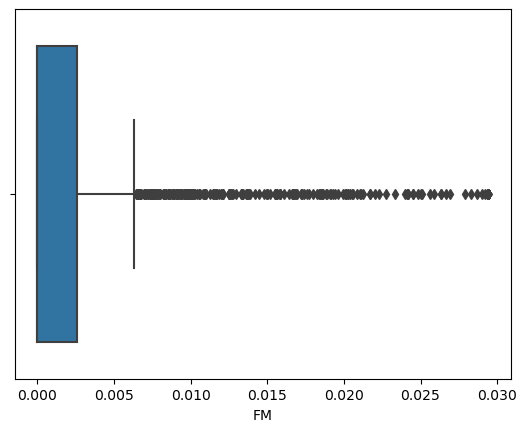

In [42]:
#Cross-checking for outliers in the FM column
sns.boxplot(x = data2['FM'])

<Axes: xlabel='FM', ylabel='Count'>

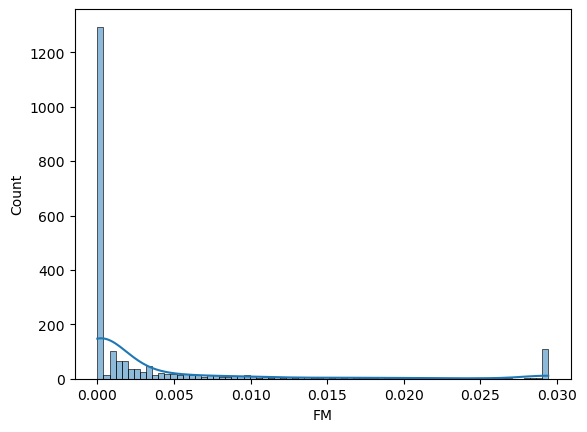

In [43]:
sns.histplot(data2['FM'], kde = True)
#We have treaated the FM column yet outliers are present but as it is a biological data forced outlier treatment would be cruel for the data.

In [44]:
data2.head(4)

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
0  120.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   2.4   
1  132.0  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0  10.4   
2  133.0  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0  13.4   
3  134.0  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0  23.0   

   Width  Tendency  NSP  
0   64.0  0.999926  2.0  
1  130.0  0.000000  1.0  
2  130.0  0.000000  1.0  
3  117.0  1.000000  1.0

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


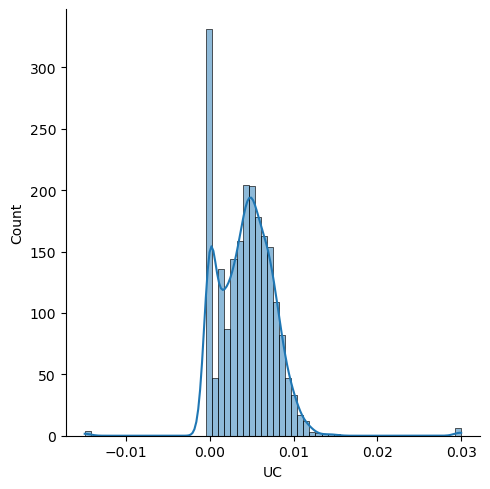

In [45]:
#checking for Ouliers in the UC column
sns.displot(data2['UC'],kde = True)

<Axes: xlabel='UC'>

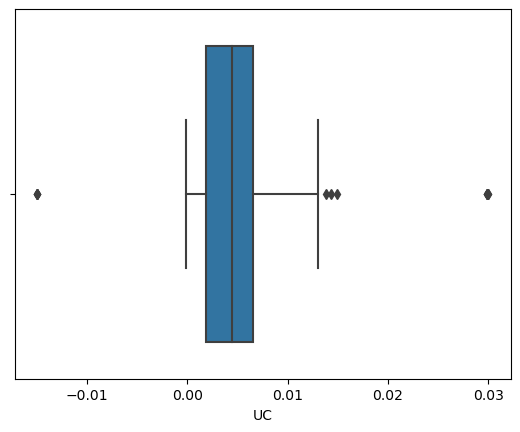

In [46]:
# Box plot for UC
sns.boxplot(x = data2["UC"])
#Outliers detected

In [47]:
data2['UC'].skew()

0.9736850759520393

In [48]:
# Outlier detection using z-score technique
#printing mean , std deviation, minimum and maximum value.
print("Mean value of UC",data2['UC'].mean())
print("Std value of UC",data2['UC'].std())
print("Min value of UC",data2['UC'].min())
print("Max value of UC",data2['UC'].max())


Mean value of UC 0.004393639313562135
Std value of UC 0.003340384035600695
Min value of UC -0.014925373
Max value of UC 0.0300018264803428


In [49]:
#Finding the boundary values
print("Highest allowed",data2['UC'].mean()+3*data2['UC'].std())
print("Lowest allowed",data2['UC'].mean()-3*data2['UC'].std())

Highest allowed 0.014414791420364222
Lowest allowed -0.0056275127932399515


In [50]:
#Finding outliers
data2[(data2['UC']>0.014414791420364222) | (data2['UC']< -0.0056275127932399)]
#This shows that there are data points beyond allowed highest and lowest value.Now we will proceed with further step of capping.

LB        AC       FM        UC        DL   DS        DP  ASTV  \
134    99.701299  0.001590  0.00000  0.029851  0.000000  0.0  0.000003  58.0   
543   140.000000  0.000029  0.00000  0.029851  0.000000  0.0  0.000000  53.0   
793   146.000000  0.000388  0.00000 -0.014925  0.001940  0.0  0.000000  52.0   
917   121.851326  0.000000  0.00000  0.029851  0.000000  0.0  0.001706  33.0   
1164  131.000000  0.010661  0.00000  0.014925  0.000000  0.0  0.000000  26.0   
1396  142.000000  0.000872  0.00000 -0.014925  0.004359  0.0  0.000000  49.0   
1469  148.000000  0.003633  0.00000 -0.014925  0.000000  0.0  0.000000  36.0   
1593  134.000000  0.000000  0.00000  0.029936  0.008086  0.0  0.000000  20.0   
1671  110.000000  0.003799  0.00076  0.029851  0.000760  0.0 -0.000017  65.0   
1717  131.000000  0.009857  0.00000  0.030002  0.000896  0.0  0.000000  54.0   
1868  138.000000  0.007143  0.00000 -0.014925  0.003571  0.0  0.000000  49.0   

      MSTV  ALTV  MLTV  Width  Tendency  NSP  
134    0.5   0.0   7.9   44.0  1.000000  1.0  
543    0.7   0.0  14.8   84.0  1.000000  1.0  
793    0.8  32.0   8.6   72.0  1.000000  1.0  
917    1.1   8.0   7.2   60.0 -0.003937  1.0  
1164   1.5   0.0   3.0   61.0  1.000000  1.0  
1396   0.9  28.0   5.8  114.0  1.000000  1.0  
1469   0.8   8.0   9.4   45.0  0.000000  1.0  
1593   2.1   0.0   8.2  115.0  0.000000  1.0  
1671   1.1   0.0   9.3   88.0 -1.000000  1.0  
1717   1.4   0.0   3.3   85.0  1.000000  1.0  
1868   1.6   0.0   6.0   92.0  1.000000  1.0

In [51]:
#Capping outliers 
upper_limit_UC = data2['UC'].mean() + 3 * data2['UC'].std()
lower_limit_UC = data2['UC'].mean() - 3 * data2['UC'].std()

data2['UC'] = np.where(
    data2['UC'] > upper_limit_UC, upper_limit_UC,
    np.where(
        data2['UC'] < lower_limit_UC, lower_limit_UC,
       data2['UC']  # Use the original data from 'LB' column
    )
)

<Axes: xlabel='UC'>

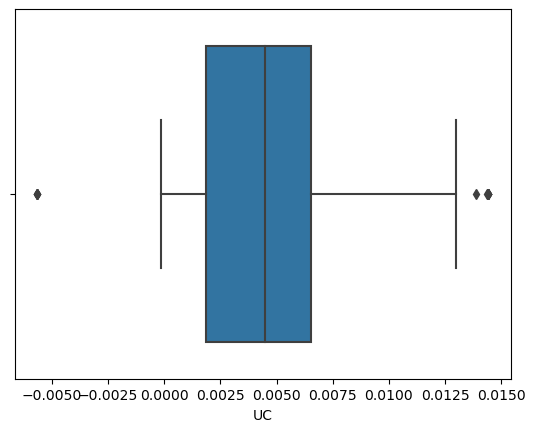

In [52]:
# Cross-checking for ouliers using box plot and histogram for UC column
sns.boxplot(x=data2['UC'])

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


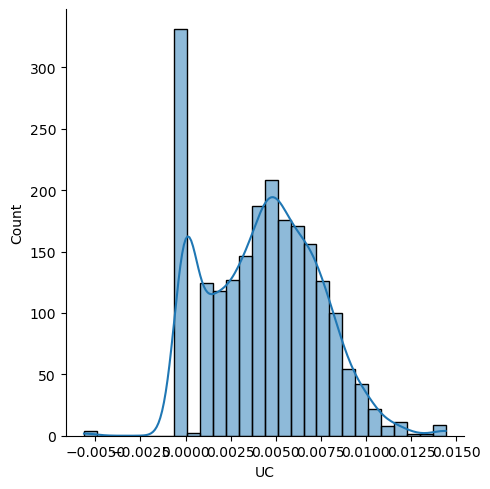

In [53]:
sns.displot(data2['UC'],kde = True)
#Outliers has been removed 

In [54]:
data2.head(4)

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
0  120.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   2.4   
1  132.0  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0  10.4   
2  133.0  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0  13.4   
3  134.0  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0  23.0   

   Width  Tendency  NSP  
0   64.0  0.999926  2.0  
1  130.0  0.000000  1.0  
2  130.0  0.000000  1.0  
3  117.0  1.000000  1.0

<Axes: xlabel='DL'>

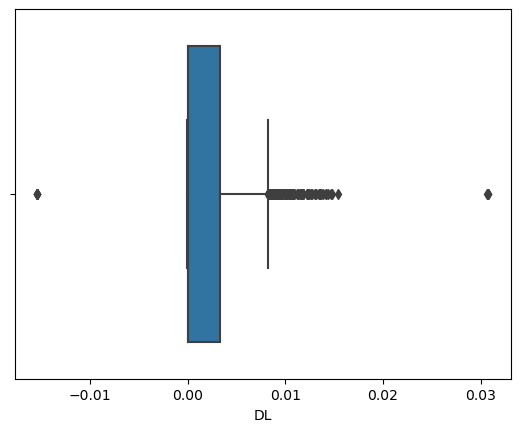

In [55]:
#Checking for outlier in the DL column
sns.boxplot(x = data2['DL'])

<Axes: xlabel='DL', ylabel='Count'>

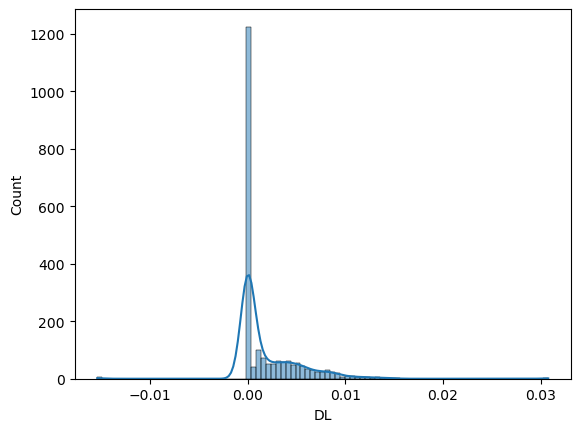

In [56]:
sns.histplot(data2['DL'],kde = True)

In [57]:
data2['DL'].skew()

2.0089272980518125

In [58]:
# As the above data is highly skewed , I will use IQR method for Outlier detection and treatment
percentile25_DL = data2['DL'].quantile(0.25)
percentile75_DL = data2['DL'].quantile(0.75)
iqr_DL = percentile75_DL - percentile25_DL


In [59]:
# Finding upper and lower limit 
upper_limit_DL = percentile75_DL + 1.5*iqr_DL
lower_limit_DL = percentile25_DL - 1.5*iqr_DL
print("Upper limit",upper_limit_DL)
print("Lower limit",lower_limit_DL)

Upper limit 0.00823047
Lower limit -0.0049382820000000004


In [60]:
data2[data2['DL']>upper_limit_DL]

LB        AC        FM        UC        DL   DS        DP       ASTV  \
5     134.0  0.001116  0.000000  0.010493  0.009444  0.0  0.002099  26.000000   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.0  0.002805  29.000000   
28    132.0 -0.000040  0.029422  0.000834  0.008340  0.0  0.000834  29.000000   
29    132.0  0.000000  0.029422  0.000000  0.012158  0.0  0.000000  26.000000   
30    132.0  0.000000  0.029422  0.001702  0.010008  0.0  0.000000  26.487809   
...     ...       ...       ...       ...       ...  ...       ...        ...   
2045  128.0  0.000000  0.006222  0.008889  0.009778  0.0  0.000000  63.000000   
2046  128.0  0.000000  0.006604  0.008491  0.009434  0.0  0.000000  63.000000   
2047  128.0  0.000000  0.007675  0.006579  0.009868  0.0  0.000000  63.000000   
2048  128.0  0.000000  0.000000  0.008032  0.010040  0.0  0.000000  63.000000   
2111  136.0  0.000000  0.001156  0.008696  0.008696  0.0  0.002174  63.000000   

      MSTV  ALTV  MLTV  Width  Tendency       NSP  
5      5.9   0.0   0.0  150.0       0.0  3.000000  
6      6.3   0.0   0.0  150.0       0.0 -1.025988  
28     4.4   0.0  10.5  141.0       0.0  2.000000  
29     6.0   0.0   5.0  143.0       0.0  1.000000  
30     4.5   0.0  12.5  149.0       0.0  1.000000  
...    ...   ...   ...    ...       ...       ...  
2045   2.7   0.0   1.3   96.0       0.0  1.000000  
2046   3.0   0.0   1.5   96.0       0.0  1.000000  
2047   2.8   0.0   1.4   96.0       0.0  1.000000  
2048   4.2   0.0   0.0   90.0       0.0  3.000000  
2111   2.2   0.0   1.9   86.0       1.0  1.000000  

[119 rows x 14 columns]

In [61]:
data2[data2['DL']< lower_limit_DL]

LB        AC   FM        UC        DL   DS        DP  ASTV  \
894   144.331585  0.000000  0.0  0.006757 -0.015385  0.0  0.000000  36.0   
967   133.000000  0.005000  0.0  0.003333 -0.015385  0.0  0.000000  27.0   
1035  125.000000  0.000000  0.0  0.004040 -0.015385  0.0  0.000000  32.0   
1218  135.000000  0.000000  0.0  0.006867 -0.015393  0.0  0.000000  54.0   
1496  132.000000  0.006124  0.0  0.009624 -0.015385  0.0  0.000000  32.0   
1963  133.000000  0.000000  0.0  0.009946 -0.015385  0.0  0.002281  61.0   

      MSTV  ALTV  MLTV  Width  Tendency  NSP  
894    0.8   2.0  10.4   27.0  0.000000  1.0  
967    1.7   0.0  20.4   89.0  1.000000  1.0  
1035   1.0  15.0   6.0   33.0  0.988564  1.0  
1218   0.5  12.0   9.0   32.0  1.000000  1.0  
1496   1.2   0.0  13.5   72.0  1.000000  5.0  
1963   2.8   0.0   0.0   98.0  0.000000  3.0

In [62]:
# Capping the outliers in the DL column
data2['DL'] = np.where(
    data2['DL'] > upper_limit_DL, upper_limit_DL,
    np.where(
        data2['DL'] < lower_limit_DL, lower_limit_DL,
        data2['DL']  # Use the original data from 'DL' column
    )
)

<Axes: xlabel='DL'>

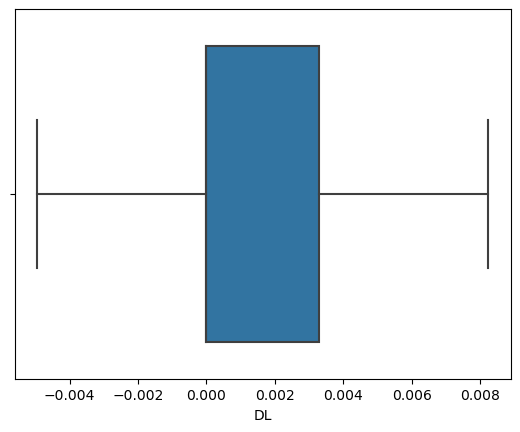

In [63]:
# Cross-checking for outliers in DL column
sns.boxplot(x = data2['DL'])

<Axes: xlabel='DL', ylabel='Count'>

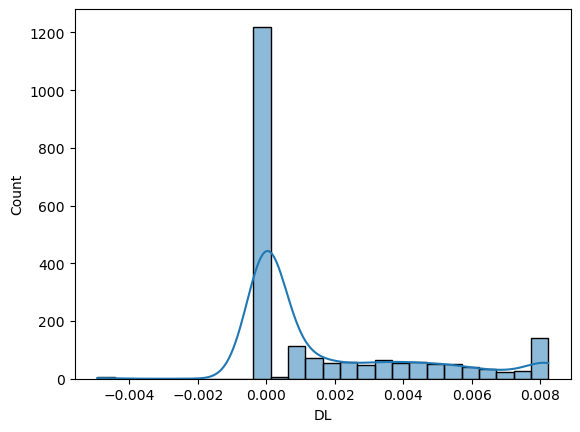

In [64]:
sns.histplot(data2['DL'] , kde = True)
# Outliers has been successfully capped

In [65]:
data2.head(4)

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
0  120.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   2.4   
1  132.0  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0  10.4   
2  133.0  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0  13.4   
3  134.0  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0  23.0   

   Width  Tendency  NSP  
0   64.0  0.999926  2.0  
1  130.0  0.000000  1.0  
2  130.0  0.000000  1.0  
3  117.0  1.000000  1.0

<Axes: xlabel='DS'>

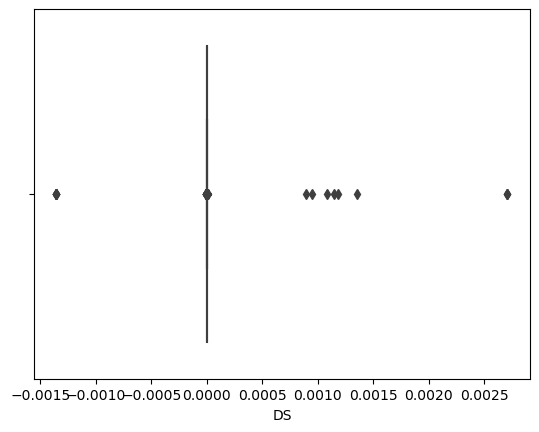

In [66]:
#checking for outliers in the DS column
sns.boxplot(x = data2['DS'])

<Axes: xlabel='DS', ylabel='Count'>

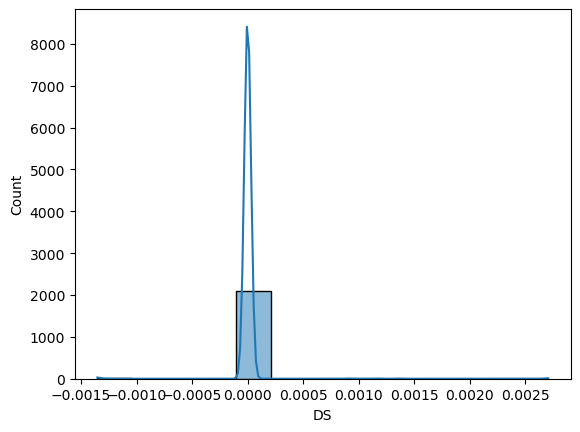

In [67]:
sns.histplot(data2['DS'] ,kde = True)

In [68]:
data2['DS'].skew()

8.457283005105776

In [69]:
# As the above data is highly skewed , I will use IQR method for Outlier detection and treatment
percentile25_DS = data2['DS'].quantile(0.25)
percentile75_DS = data2['DS'].quantile(0.75)
iqr_DS = percentile75_DS - percentile25_DS

In [70]:
# Finding upper and lower limit 
upper_limit_DS = percentile75_DS + 1.5*iqr_DS
lower_limit_DS = percentile25_DS - 1.5*iqr_DS
print("Upper limit",upper_limit_DS)
print("Lower limit",lower_limit_DS)

Upper limit 0.0
Lower limit 0.0


In [71]:
data2[data2['DS'] > upper_limit_DS ]

LB        AC        FM        UC        DL            DS        DP  \
38    115.0  0.006242  0.029422  0.003745  0.001248  3.667736e-06  0.000000   
84    145.0  0.012712  0.029422  0.001412  0.000000  2.542969e-06  0.000000   
139   159.0  0.001546  0.000000  0.009274  0.000000  8.656021e-07  0.000000   
151   148.0  0.000000  0.000000  0.004065  0.000000  1.165446e-06  0.000000   
174   119.0  0.001894  0.000000  0.003788  0.000000  5.577852e-07  0.000000   
...     ...       ...       ...       ...       ...           ...       ...   
1987  135.0  0.007257  0.000000  0.004354  0.000000  7.538983e-07  0.000000   
2015  125.0  0.000000  0.000000  0.009132  0.006849  1.604855e-06  0.001142   
2033  129.0  0.000000  0.001122  0.006734  0.005767  4.249675e-06  0.002245   
2061  127.0  0.000000  0.000000  0.004575  0.000000  2.390162e-07  0.000000   
2112  136.0  0.000000  0.004823  0.006431  0.008039  9.488398e-07  0.001608   

      ASTV      MSTV  ALTV       MLTV  Width  Tendency       NSP  
38    22.0  3.600000   0.0  19.600000  138.0       0.0  1.000000  
84    41.0  1.100000   0.0  11.400000  125.0       1.0  1.000000  
139   58.0  0.500000  13.0   8.000000   42.0       0.0  2.000000  
151   55.0  0.600000  13.0  10.400000   46.0       1.0  1.000000  
174   31.0  1.300000   3.0  11.300000   89.0       0.0  1.000000  
...    ...       ...   ...        ...    ...       ...       ...  
1987  58.0  0.800000   0.0   7.500000   50.0       0.0  1.000000  
2015  65.0  1.316122   0.0   6.500000   82.0       0.0  1.000000  
2033  67.0  3.200000   0.0 -50.700000   80.0       0.0  3.000000  
2061  63.0  0.500000  71.0   4.000000   12.0       0.0  1.000000  
2112  63.0  2.200000   0.0   4.934339   85.0       1.0  1.004234  

[67 rows x 14 columns]

In [72]:
data2[data2['DS'] < lower_limit_DS ]

LB        AC        FM        UC        DL            DS  \
33    120.000000  0.007506  0.029422  0.000800  0.000834 -1.790000e-06   
69    144.000000  0.000000  0.000000  0.004992  0.000000 -3.240000e-06   
113   129.000000  0.000000  0.002941  0.005882  0.000000 -2.260000e-06   
177   119.000000  0.007744  0.000000  0.004840  0.000968 -2.220000e-06   
209   124.000000  0.000000  0.006969  0.000000  0.000000 -3.090000e-06   
226   127.000000  0.006672  0.005004  0.000000  0.000000 -2.520000e-06   
273   123.000000  0.000000  0.000000  0.000000  0.000000 -3.270000e-06   
322   135.000000  0.000000  0.000834  0.000000  0.000000 -1.090000e-06   
326   144.000000  0.000000  0.018541  0.000000  0.000000 -5.370000e-06   
343   139.000000  0.000000  0.005004  0.000000  0.000000 -1.700000e-06   
361   133.000000  0.000000  0.011429  0.003810  0.000000 -4.210000e-06   
446   142.000000  0.000000  0.005859  0.000000  0.000000 -8.960000e-08   
491   120.000000  0.011236  0.029422  0.000000  0.000000 -3.980000e-07   
551   136.000000  0.009994  0.000000  0.005838  0.000000 -4.760000e-07   
633   144.000000  0.000000  0.000000  0.000000  0.000000 -2.610000e-07   
682   132.000000  0.000000  0.029422  0.003597  0.003597 -2.510000e-06   
743   142.000000  0.000966  0.000000  0.004831  0.008230 -2.900000e-06   
746   142.000000  0.001167  0.000000  0.004667  0.008230 -2.500000e-06   
748   134.000000  0.000000  0.003336  0.000000  0.000000 -2.050000e-06   
749   133.867029  0.000000  0.002584  0.000000  0.000000 -1.353180e-03   
807   146.000000  0.000000  0.000000  0.001166  0.000000 -5.050000e-06   
823   152.000000  0.000000  0.000000  0.003122  0.000000 -1.220000e-07   
879   136.000000  0.001289  0.000000  0.005155  0.000000 -3.450000e-07   
891   136.000000  0.000000  0.000000  0.004045  0.000000 -7.380000e-07   
895   144.000000  0.000000  0.000000  0.006390  0.000000 -8.130000e-07   
925   122.000000  0.002469  0.000000  0.004938  0.002469 -6.650000e-06   
963   133.000000  0.000000  0.000000  0.001289  0.007732 -8.230000e-07   
1057  127.000000 -0.000005  0.000000  0.007511  0.007511 -8.070000e-07   
1066  133.000000  0.014030  0.000000  0.005959  0.000000 -1.230000e-06   
1117  122.000000  0.000000  0.000000  0.001395  0.000000 -1.353180e-03   
1162  131.000000  0.006243  0.000000  0.009365  0.000000 -1.353180e-03   
1287  112.000000  0.000000  0.000000  0.005952  0.000000 -4.010000e-06   
1312  125.000000  0.014030  0.010076  0.005038  0.002519 -2.590000e-06   
1324  128.000000  0.001355  0.010840  0.005420  0.004065 -6.520000e-06   
1373  121.000000  0.008325  0.000000  0.006243  0.001041 -2.470000e-06   
1448  147.000000  0.005610  0.000000  0.005610  0.000000 -1.353180e-03   
1501  132.000000  0.007853  0.000000  0.010471  0.000000 -1.470000e-06   
1524  133.000000  0.000000  0.000000  0.006504  0.000000 -4.740000e-07   
1535  136.000000  0.000000  0.000000  0.006717  0.000000 -2.010000e-06   
1726  134.000000  0.002643  0.000876  0.007011  0.005259 -3.740000e-07   
1738  134.000000  0.006121  0.000000  0.006886  0.003826 -1.353180e-03   
1777  121.000000  0.002970  0.001980  0.002970  0.004950 -1.550000e-06   
1800  143.000000  0.000000  0.000000  0.003717  0.000000 -3.840000e-06   
1820  141.000000  0.006250  0.000000  0.006250  0.000000 -1.353180e-03   
1845  137.000000  0.000000  0.000000  0.008475  0.004843 -8.510000e-10   
1872  138.000000  0.002854  0.000000  0.005709  0.006660 -1.550000e-09   
1885  141.000000  0.005720  0.000000  0.006673  0.000000 -6.050000e-08   
1889  141.000000  0.004946  0.000000  0.006924  0.000000 -3.620000e-07   
1937  133.000000  0.000000  0.003212  0.008565  0.003212 -1.070000e-06   
2053  127.000000  0.002793  0.002793  0.006983  0.000000 -4.110000e-06   
2075  130.000000  0.007011  0.000876  0.000876  0.000000 -1.353180e-03   
2080  130.000000  0.003003  0.002002  0.001001  0.000000 -2.120000e-06   
2088  133.000000  0.000000  0.001236  0.006180  0.000000 -8.720000e-07   

            DP   

In [73]:
# Capping the outliers in the DS column
data2['DS'] = np.where(
    data2['DS'] > upper_limit_DS, upper_limit_DS,
    np.where(
        data2['DS'] < lower_limit_DS, lower_limit_DS,
        data2['DS']  # Use the original data from 'DS' column
    )
)

<Axes: xlabel='DS'>

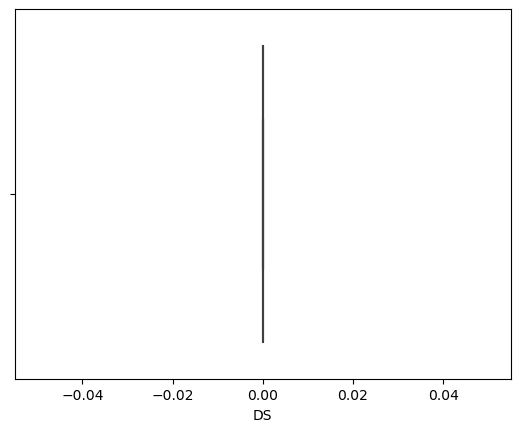

In [74]:
# cross-checking for outliers in DS column
sns.boxplot(x = data2['DS'])

<Axes: xlabel='DS', ylabel='Count'>

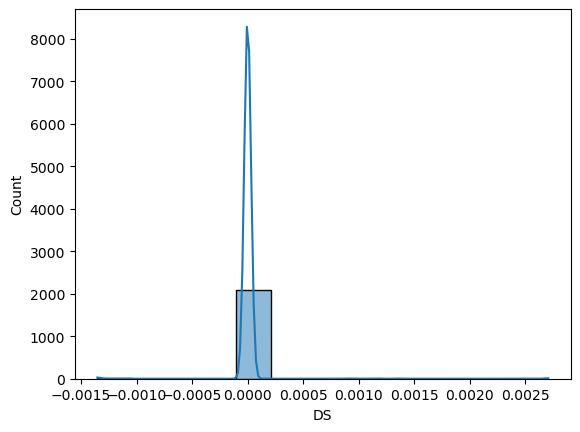

In [75]:
sns.histplot(data['DS'], kde = True)
# Outliers has been successfully capped in the DS column   

In [76]:
data2.head(4)

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
0  120.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   2.4   
1  132.0  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0  10.4   
2  133.0  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0  13.4   
3  134.0  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0  23.0   

   Width  Tendency  NSP  
0   64.0  0.999926  2.0  
1  130.0  0.000000  1.0  
2  130.0  0.000000  1.0  
3  117.0  1.000000  1.0

<Axes: xlabel='DP'>

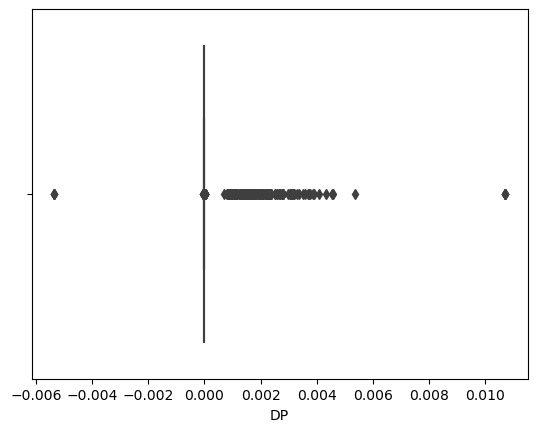

In [77]:
# checking for outliers in the DP column
sns.boxplot(x = data2['DP'])

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


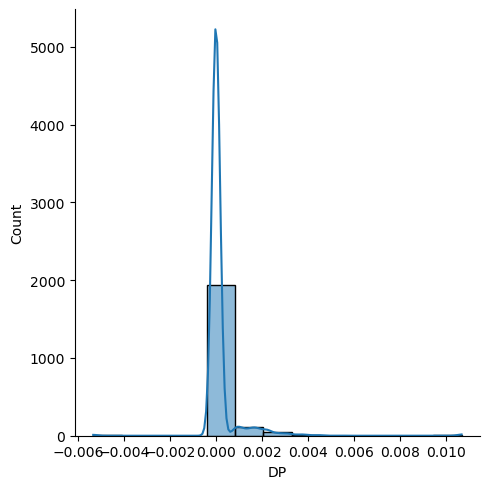

In [78]:
sns.displot(data2['DP'],kde=True)

In [79]:
data2['DP'].skew()

6.453123654223516

In [80]:
# As the above data is highly skewed , I will use IQR method for Outlier detection and treatment
percentile25_DP = data2['DP'].quantile(0.25)
percentile75_DP = data2['DP'].quantile(0.75)
iqr_DP = percentile75_DP - percentile25_DP

In [81]:
# Finding upper and lower limit 
upper_limit_DP = percentile75_DP + 1.5*iqr_DP
lower_limit_DP = percentile25_DP - 1.5*iqr_DP
print("Upper limit",upper_limit_DP)
print("Lower limit",lower_limit_DP)

Upper limit 0.0
Lower limit 0.0


In [82]:
data2[data2['DP'] > upper_limit_DP ]

LB        AC        FM        UC        DL   DS        DP  ASTV  \
5     134.0  0.001116  0.000000  0.010493  0.008230  0.0  0.002099  26.0   
6     134.0  0.001403  0.000000  0.012623  0.008230  0.0  0.002805  29.0   
14    130.0  0.005838  0.029422  0.004170  0.005004  0.0  0.000826  21.0   
15    130.0  0.005571  0.029422  0.004178  0.004178  0.0  0.001393  19.0   
17    131.0  0.001524  0.029422  0.003049  0.004573  0.0  0.001524  18.0   
...     ...       ...       ...       ...       ...  ...       ...   ...   
2064  127.0  0.000000  0.000975  0.005848  0.000000  0.0  0.000019  71.0   
2073  130.0  0.007321  0.000732  0.000732  0.000000  0.0  0.000032  71.0   
2110  136.0  0.000000  0.004110  0.008219  0.006849  0.0  0.001370  64.0   
2111  136.0  0.000000  0.001156  0.008696  0.008230  0.0  0.002174  63.0   
2112  136.0  0.000000  0.004823  0.006431  0.008039  0.0  0.001608  63.0   

        MSTV       ALTV       MLTV  Width  Tendency       NSP  
5     5.9000   0.000000   0.000000  150.0       0.0  3.000000  
6     6.3000   0.000000   0.000000  150.0       0.0 -1.025988  
14    2.3000   0.000000   7.900000  107.0       0.0  1.000000  
15    2.2934   0.000000   8.700000  107.0       0.0  1.000000  
17    2.4000  -0.546430  13.900000  107.0       0.0  2.000000  
...      ...        ...        ...    ...       ...       ...  
2064  0.9000  52.000000   4.054948   18.0       0.0  1.000000  
2073  0.7000   5.000000   3.800000   31.0       0.0  1.000000  
2110  2.2000   0.453936   3.000000   85.0       1.0  1.000000  
2111  2.2000   0.000000   1.900000   86.0       1.0  1.000000  
2112  2.2000   0.000000   4.934339   85.0       1.0  1.004234  

[232 rows x 14 columns]

In [83]:
data2[data2['DP'] < lower_limit_DP ]

LB        AC        FM        UC        DL   DS            DP  \
34    120.000000  0.009105  0.029422  0.001517  0.001517  0.0 -1.350000e-05   
123   123.000000  0.005594  0.000000  0.005607  0.003738  0.0 -5.347594e-03   
251   130.000000  0.000000  0.009164  0.005727  0.000000  0.0 -5.690000e-06   
253   130.000000  0.000000  0.000000  0.000000  0.000000  0.0 -6.210000e-06   
323   135.000000  0.000000  0.000000  0.000000  0.000000  0.0 -5.347594e-03   
376   141.000000  0.005004  0.023353  0.001668  0.000834  0.0 -2.970000e-05   
390   129.000000  0.009820  0.029422  0.003273  0.000000  0.0 -2.740000e-06   
396   143.000000  0.000000  0.000000  0.001541  0.000000  0.0 -2.190000e-05   
413   147.000000  0.000000  0.000000  0.000000  0.000000  0.0 -2.560000e-06   
438   151.000000  0.000000  0.000000  0.006417  0.004278  0.0 -1.030000e-05   
462   120.000000  0.004478  0.001493  0.002985  0.000000  0.0 -1.630000e-05   
482   139.000000  0.001842  0.007366  0.000000  0.000000  0.0 -1.570000e-05   
493   120.000000  0.009105  0.029422  0.001517  0.000000  0.0 -2.250000e-05   
511   154.000000  0.007581  0.001245  0.002491  0.000000  0.0 -3.430000e-05   
519   126.000000  0.007645  0.029422  0.004587  0.000000  0.0 -1.020000e-06   
553   140.000000  0.003336  0.000000  0.008340  0.003336  0.0 -9.360000e-06   
613   146.000000  0.009167  0.005376  0.000833 -0.000039  0.0 -2.040000e-05   
644   123.000000  0.000000  0.000000  0.000834  0.000000  0.0 -1.880000e-05   
667   138.000000  0.000000  0.000000  0.005222 -0.000050  0.0 -4.380000e-05   
719   129.000000  0.000000  0.009558  0.004779 -0.000045  0.0 -5.170000e-06   
781   128.000000  0.000000  0.001681  0.000000  0.000000  0.0 -4.480000e-05   
802   146.507943  0.000000  0.000000  0.006369  0.000000  0.0 -1.360000e-05   
805   146.000000  0.000000  0.000000  0.001104  0.000000  0.0 -1.870000e-05   
834   128.000000  0.007216  0.000000  0.003093  0.005155  0.0 -1.830000e-05   
877   136.000000  0.002401  0.000000  0.004802  0.000000  0.0 -2.810000e-05   
895   144.000000  0.000000  0.000000  0.006390  0.000000  0.0 -2.750000e-06   
912   146.000000  0.004614  0.000000  0.004630  0.001157  0.0 -4.030000e-06   
957   136.000000  0.000000  0.000000  0.007874  0.007874  0.0 -2.080000e-05   
1024  135.000000  0.006745  0.000000  0.008432  0.005059  0.0 -1.770000e-05   
1129  122.000000  0.006359  0.000000  0.004769  0.000000  0.0 -3.520000e-06   
1176  126.000000  0.000000  0.000000  0.005464  0.000000  0.0 -1.530000e-06   
1183  120.000000  0.000000  0.000000  0.008811  0.000000  0.0 -3.370000e-05   
1230  126.000000  0.000929  0.000000  0.004647  0.000000  0.0 -6.990000e-06   
1233  125.000000  0.000000  0.000000  0.008000  0.000000  0.0 -5.347594e-03   
1243  115.000000  0.005656  0.000000  0.006787  0.000000  0.0 -1.500000e-05   
1263  119.000000  0.004444  0.000000  0.007413  0.001481  0.0 -2.020000e-05   
1269  119.000000  0.000000  0.000000  0.006135  0.000000  0.0 -1.490000e-05   
1378  121.000000  0.002829  0.000000  0.005658  0.005658  0.0 -1.700000e-05   
1415  142.000000  0.013208  0.000000  0.007445  0.000000  0.0 -2.440000e-05   
1447  147.000000  0.001245  0.001788  0.002491  0.000000  0.0 -8.840000e-06   
1512  130.000000  0.002907  0.000000  0.007267  0.000000  0.0 -1.500000e-05   
1550  149.000000  0.001256  0.000000  0.007538 -0.000027  0.0 -1.260000e-05   
1560  144.000000  0.000000  0.000000  0.004141  0.002070  0.0 -3.030000e-06   
1585  132.000000  0.001433  0.000000  0.005731  0.005731  0.0 -7.030000e-06   
1615  144.000000  0.000726  0.029422  0.001452  0.008230  0.0 -5.347594e-03   
1623  126.000000  0.012743  0.002012  0.006707  0.000671  0.0 -1.790000e-07   
1633  130.000000  0.000808  0.002423  0.008078  0.001616  0.0 -2.350000e-05   
1661  106.001581  0.000000  0.000000  0.010352  0.000000  0.0 -2.590000e-05   
1671  110.000000  0.003799  0.000760  0.014415  0.000760  0.0 -1.730000e-05   
1711  131.000000  0.008008  0.003003  0.002002  0.000000  0.0 -1

In [84]:
# Capping the outliers in the DP column
data2['DP'] = np.where(
    data2['DP'] > upper_limit_DP, upper_limit_DP,
    np.where(
        data2['DP'] < lower_limit_DP, lower_limit_DP,
        data2['DP']  # Use the original data from 'DP' column
    )
)

<Axes: xlabel='DP'>

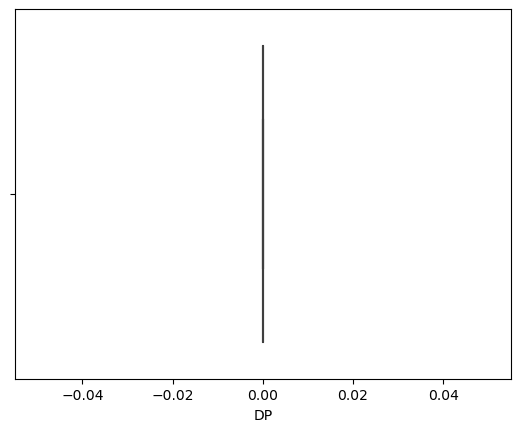

In [85]:
# cross checking for outliers
sns.boxplot(x = data2['DP'])

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


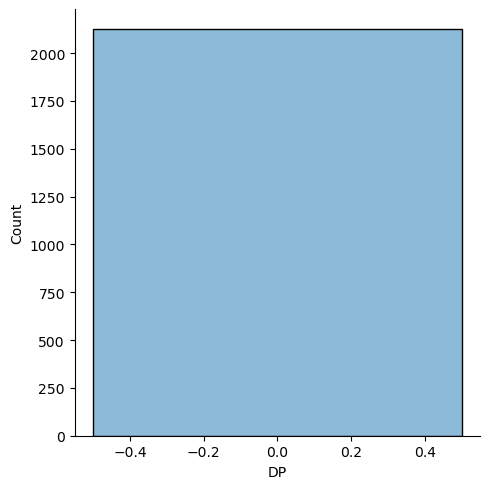

In [86]:
sns.displot(data2['DP'], kde = True)
# outliers successfully capped for DP column

In [87]:
data2.head(4)

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
0  120.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   2.4   
1  132.0  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0  10.4   
2  133.0  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0  13.4   
3  134.0  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0  23.0   

   Width  Tendency  NSP  
0   64.0  0.999926  2.0  
1  130.0  0.000000  1.0  
2  130.0  0.000000  1.0  
3  117.0  1.000000  1.0

<Axes: xlabel='ASTV'>

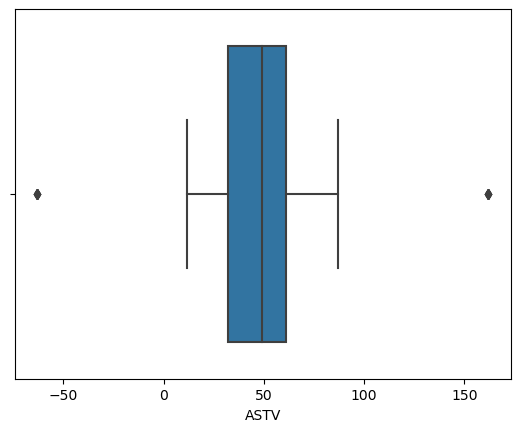

In [88]:
#checking for outliers in the ASTV column
sns.boxplot(x=data2['ASTV'])

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


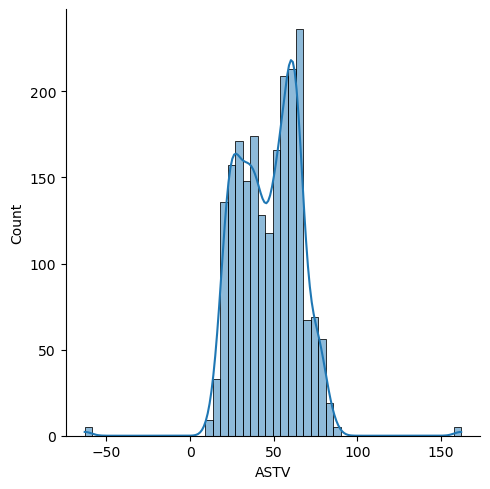

In [89]:
sns.displot(data2['ASTV'], kde = True)

In [90]:
data2['ASTV'].skew()
# Data is very slightly skewed , we can consider it as normally distributed.

0.054886809061591824

In [91]:
# As data in the ASTV column is almost normally distributed we will use z-score method for Outlier detection and treatment
# Outlier detection using z-score technique
#printing mean , std deviation, minimum and maximum value.
print("Mean value of ASTV",data2['ASTV'].mean())
print("Std value of ASTV",data2['ASTV'].std())
print("Min value of ASTV",data2['ASTV'].min())
print("Max value of ASTV",data2['ASTV'].max())

Mean value of ASTV 47.01245871631117
Std value of ASTV 18.812403291543866
Min value of ASTV -63.0
Max value of ASTV 162.0


In [92]:
#Finding the boundary values
print("Highest allowed",data2['ASTV'].mean()+3*data2['ASTV'].std())
print("Lowest allowed",data2['ASTV'].mean()-3*data2['ASTV'].std())

Highest allowed 103.44966859094276
Lowest allowed -9.424751158320426


In [93]:
#Finding outliers
data2[(data2['ASTV'] > 103.44966859094276) | (data2['ASTV'] < -9.424751158320426)]
#This shows that there are data points beyond allowed highest and lowest value.Now we will proceed with further step of Trimming.

LB        AC        FM        UC        DL   DS   DP   ASTV  \
131   158.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  -63.0   
232   123.000000  0.003650  0.005474  0.000000  0.000000  0.0  0.0  162.0   
345   139.000000 -0.000007  0.006593  0.000000  0.000000  0.0  0.0  162.0   
504   128.000000  0.008253  0.013755  0.004127  0.000000  0.0  0.0  -63.0   
1014  139.000000  0.006312  0.000000  0.004509  0.000000  0.0  0.0  162.0   
1027   99.701299  0.009485  0.000000  0.005420  0.002710  0.0  0.0  -63.0   
1195  138.000000  0.011752  0.000000  0.005342  0.000000  0.0  0.0  -63.0   
1578  132.000000  0.000000  0.000000  0.002994  0.000074  0.0  0.0  -63.0   
1941  133.000000  0.000000  0.003562  0.006233  0.003562  0.0  0.0  162.0   
2008  125.000000  0.001196  0.001196  0.008373  0.008230  0.0  0.0  162.0   

      MSTV  ALTV       MLTV       Width  Tendency      NSP  
131    0.6  31.0   8.600000   92.000000       1.0  1.00000  
232    0.7   0.0   8.600000   71.000000       1.0  0.98342  
345    0.2  59.0   4.200000   11.000000       0.0  2.00000  
504    1.1   0.0  12.700000  123.000000       0.0  1.00000  
1014   0.8   0.0   7.600000   33.913652      -1.0  1.00000  
1027   2.5   0.0   3.900000   98.000000       0.0  1.00000  
1195   1.2   0.0   4.100000   48.000000       0.0  1.00000  
1578   1.1   0.0  13.700000   52.000000       1.0  1.00000  
1941   2.1   0.0   1.527002   98.000000       0.0  1.00000  
2008   1.1   0.0   4.100000  100.000000       0.0  1.00000

In [94]:
# Trimming the selected rows above from ASTV column
data3 = data2[(data2['ASTV'] < 103.44966859094276) & (data2['ASTV'] > -9.424751158320426)]

In [95]:
data3

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.029422  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616  0.000000  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2114 rows x 14 columns]

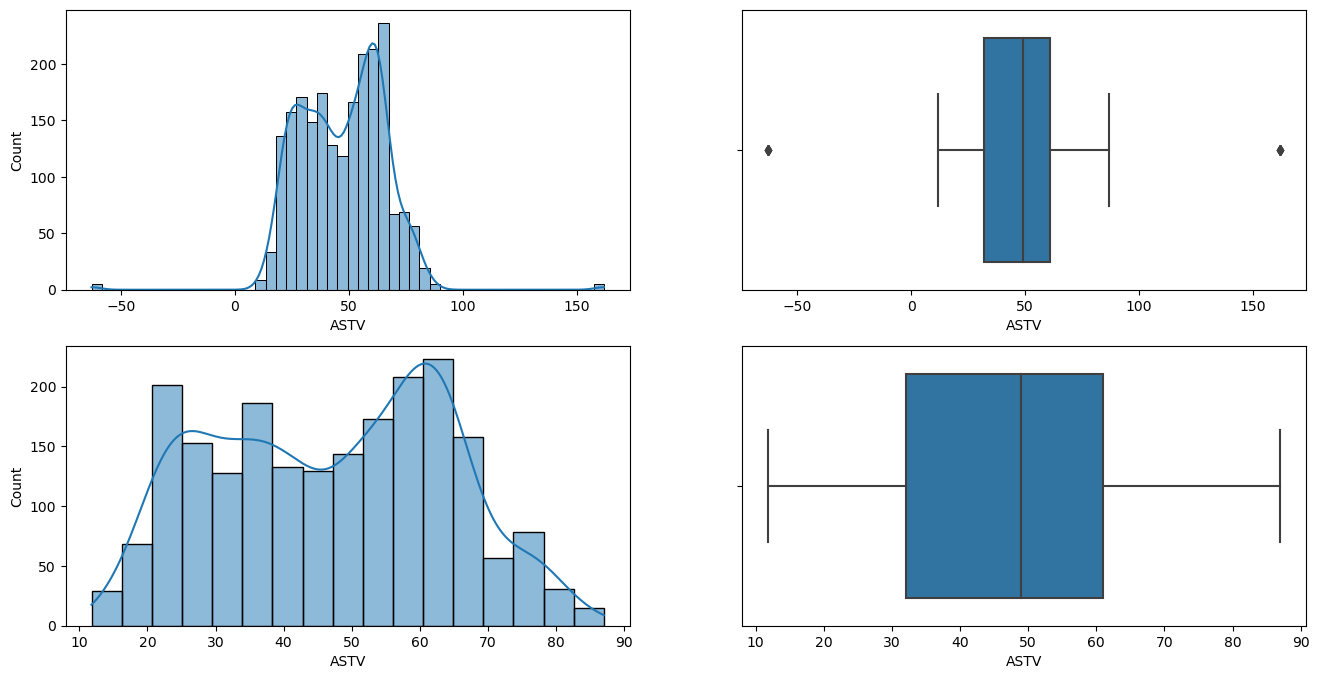

In [96]:
# Comapairing Data2 and Data3 ASTV column for changes in the outliers.
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.histplot(data2['ASTV'], kde = True)

plt.subplot(2,2,2)
sns.boxplot(x = data2['ASTV'])

plt.subplot(2,2,3)
sns.histplot(data3['ASTV'], kde = True)

plt.subplot(2,2,4)
sns.boxplot(x = data3['ASTV'])

plt.show()

#comparison clearly shows that outliers has been removed.

In [97]:
data3.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

<Axes: xlabel='MSTV'>

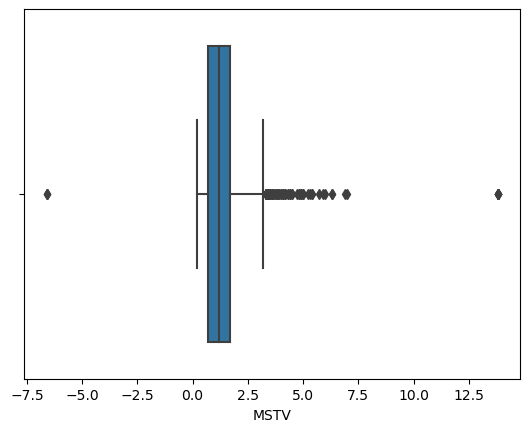

In [98]:
# checking for outliers in the MSTV column
sns.boxplot(x= data3['MSTV'])

<Axes: xlabel='MSTV', ylabel='Count'>

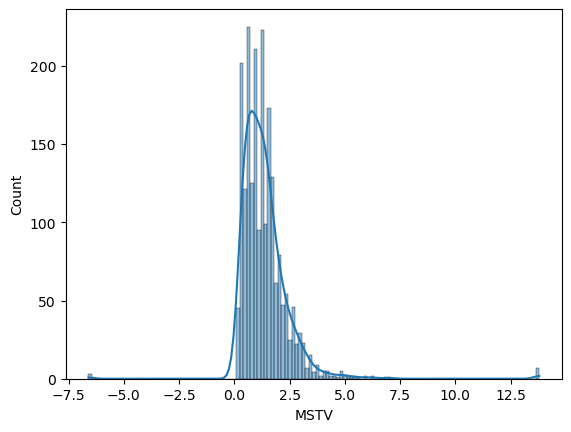

In [99]:
sns.histplot(data3['MSTV'], kde = True)

In [100]:
data3['MSTV'].skew()

4.139576023100594

In [101]:
# As the above data is highly skewed , I will use IQR method for Outlier detection and treatment
percentile25_MSTV = data3['MSTV'].quantile(0.25)
percentile75_MSTV = data3['MSTV'].quantile(0.75)
iqr_MSTV = percentile75_MSTV - percentile25_MSTV

In [102]:
# Finding upper and lower limit 
upper_limit_MSTV = percentile75_MSTV + 1.5*iqr_MSTV
lower_limit_MSTV = percentile25_MSTV - 1.5*iqr_MSTV
print("Upper limit",upper_limit_MSTV)
print("Lower limit",lower_limit_MSTV)

Upper limit 3.2
Lower limit -0.8


In [103]:
# Capping the outliers in the MSTV column
data3['MSTV'] = np.where(
    data3['MSTV'] > upper_limit_MSTV, upper_limit_MSTV,
    np.where(
        data3['MSTV'] < lower_limit_MSTV, lower_limit_MSTV,
        data3['MSTV']  # Use the original data from 'MSTV' column
    )
)

C:\Users\singh\AppData\Local\Temp\ipykernel_16076\1816456922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['MSTV'] = np.where(


<Axes: xlabel='MSTV'>

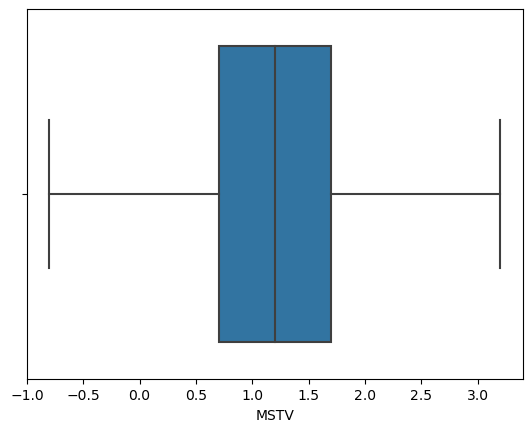

In [104]:
# cross-checking for outliers in the MSTV column
sns.boxplot(x = data3['MSTV'])

<Axes: xlabel='MSTV', ylabel='Count'>

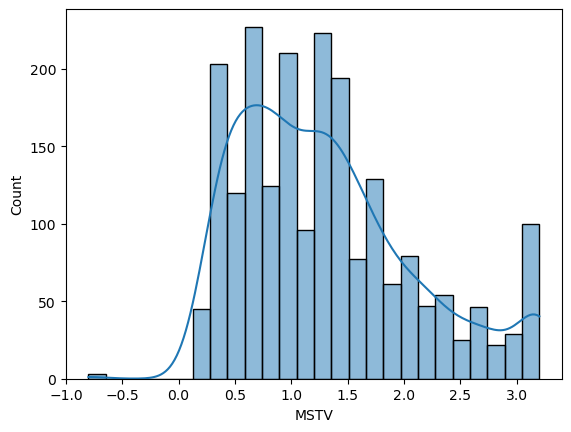

In [105]:
sns.histplot(data3['MSTV'], kde = True)
# ouliers successfully capped

In [106]:
data3.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

<Axes: xlabel='ALTV'>

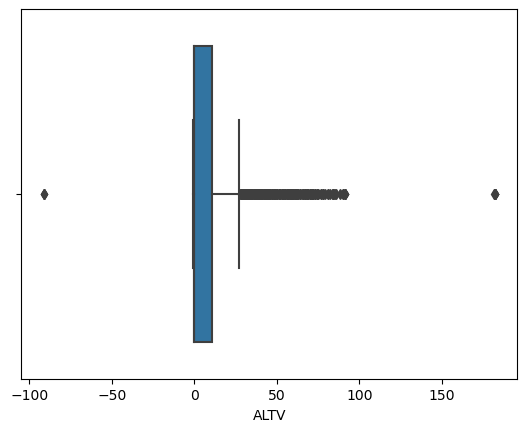

In [107]:
#Checking for outliers in the ALTV column
sns.boxplot(x=data3['ALTV'])

<Axes: xlabel='ALTV', ylabel='Count'>

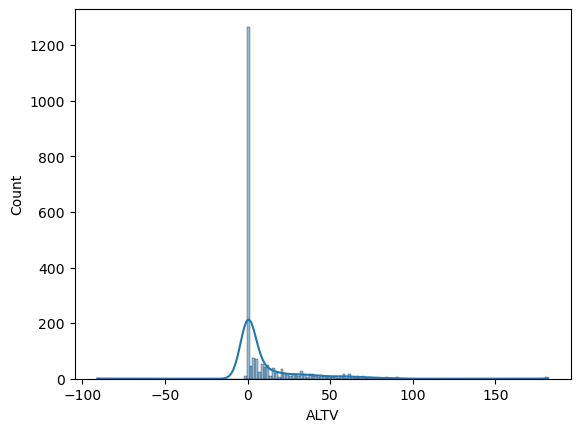

In [108]:
sns.histplot(data3['ALTV'], kde = True)

In [109]:
data3['ALTV'].skew()

2.9830254573331962

In [110]:
# As the above data is highly skewed , I will use IQR method for Outlier detection and treatment
percentile25_ALTV = data3['ALTV'].quantile(0.25)
percentile75_ALTV = data3['ALTV'].quantile(0.75)
iqr_ALTV = percentile75_ALTV - percentile25_ALTV

In [111]:
# Finding upper and lower limit 
upper_limit_ALTV = percentile75_ALTV + 1.5*iqr_ALTV
lower_limit_ALTV = percentile25_ALTV - 1.5*iqr_ALTV
print("Upper limit",upper_limit_ALTV)
print("Lower limit",lower_limit_ALTV)

Upper limit 27.5
Lower limit -16.5


In [112]:
# Capping the outliers in the ALTV column
data3['ALTV'] = np.where(
    data3['ALTV'] > upper_limit_ALTV, upper_limit_ALTV,
    np.where(
        data3['ALTV'] < lower_limit_ALTV, lower_limit_ALTV,
        data3['ALTV']  # Use the original data from 'ALTV' column
    )
)

C:\Users\singh\AppData\Local\Temp\ipykernel_16076\1957679789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['ALTV'] = np.where(


<Axes: xlabel='ALTV'>

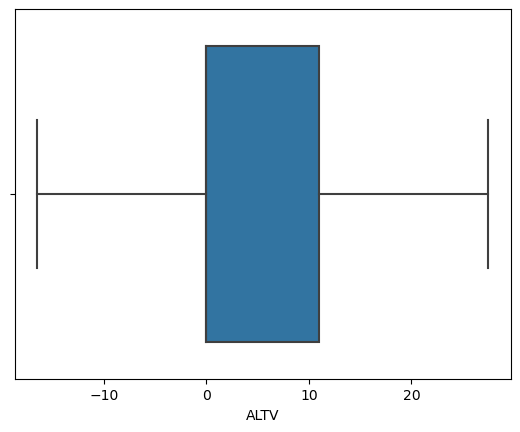

In [113]:
# cross-checking for outlier in the ALTV column
sns.boxplot(x = data3['ALTV'])

<Axes: xlabel='ALTV', ylabel='Count'>

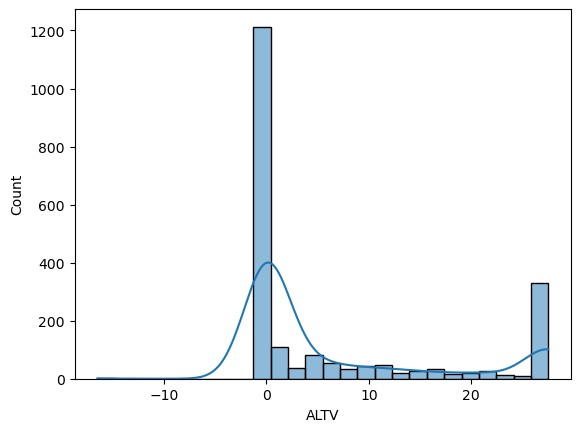

In [114]:
sns.histplot(data3['ALTV'], kde = True)
# outliers successfully capped

In [115]:
data3.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  27.5   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

<Axes: xlabel='MLTV'>

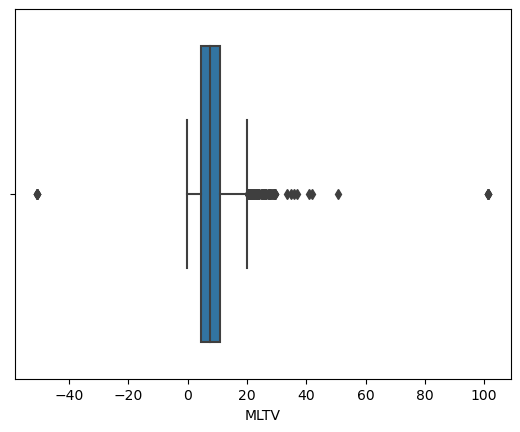

In [116]:
# checking for outlier in the MLTV cloumn
sns.boxplot(x=data3['MLTV'])

<Axes: xlabel='MLTV', ylabel='Count'>

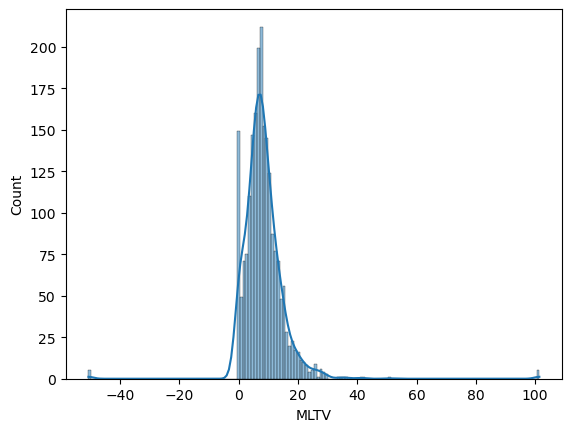

In [117]:
sns.histplot(data3['MLTV'], kde = True)

In [118]:
data3['MLTV'].skew()

3.5600231438431997

In [119]:
# As the above data is highly skewed , I will use IQR method for Outlier detection and treatment
percentile25_MLTV = data3['MLTV'].quantile(0.25)
percentile75_MLTV = data3['MLTV'].quantile(0.75)
iqr_MLTV = percentile75_MLTV - percentile25_MLTV

In [120]:
# Finding upper and lower limit 
upper_limit_MLTV = percentile75_MLTV + 1.5*iqr_MLTV
lower_limit_MLTV = percentile25_MLTV - 1.5*iqr_MLTV
print("Upper limit",upper_limit_MLTV)
print("Lower limit",lower_limit_MLTV)

Upper limit 20.1
Lower limit -4.700000000000001


In [121]:
# Capping the outliers in the MLTV column
data3['MLTV'] = np.where(
    data3['MLTV'] > upper_limit_MLTV, upper_limit_MLTV,
    np.where(
        data3['MLTV'] < lower_limit_MLTV, lower_limit_MLTV,
        data3['MLTV']  # Use the original data from 'MLTV' column
    )
)

C:\Users\singh\AppData\Local\Temp\ipykernel_16076\2114614896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['MLTV'] = np.where(


<Axes: xlabel='MLTV'>

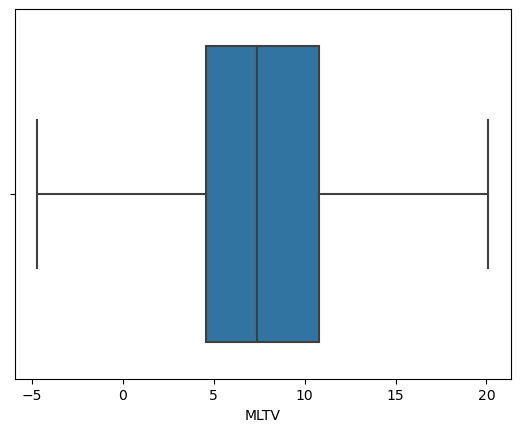

In [122]:
# cross-checking for outlier in the MLTV column
sns.boxplot(x = data3['MLTV'])

<Axes: xlabel='MLTV', ylabel='Count'>

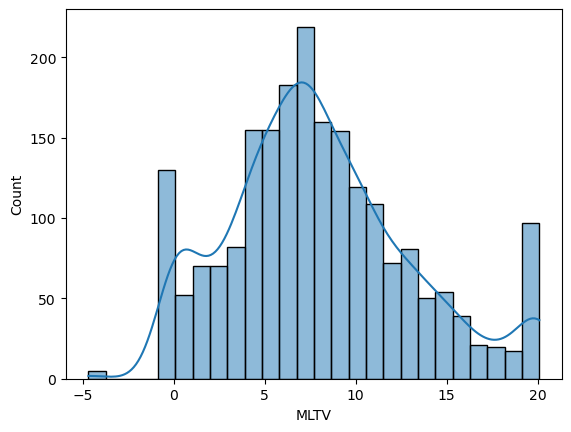

In [123]:
sns.histplot(data3['MLTV'], kde = True)
# outliers successfully capped

In [124]:
data3.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  27.5   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  20.1  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

<Axes: xlabel='Width'>

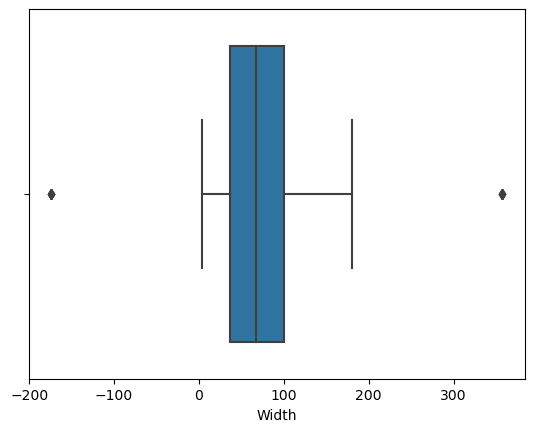

In [125]:
#checking for outliers in the Width column
sns.boxplot(x = data3['Width'])

<Axes: xlabel='Width', ylabel='Count'>

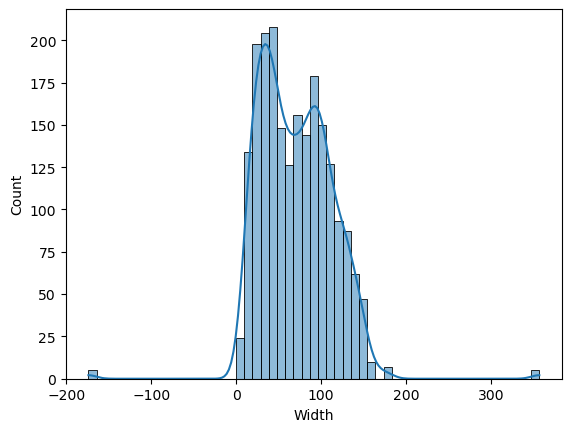

In [126]:
sns.histplot(data3['Width'], kde = True)

In [127]:
data3['Width'].skew()

0.500243306930318

In [128]:
# As the above data is moderately skewed , I will use IQR method for Outlier detection and treatment
percentile25_Width = data3['Width'].quantile(0.25)
percentile75_Width = data3['Width'].quantile(0.75)
iqr_Width = percentile75_Width - percentile25_Width

In [129]:
# Finding upper and lower limit 
upper_limit_Width = percentile75_Width + 1.5*iqr_Width
lower_limit_Width = percentile25_Width - 1.5*iqr_Width
print("Upper limit",upper_limit_Width)
print("Lower limit",lower_limit_Width)

Upper limit 194.5
Lower limit -57.5


In [130]:
# Capping the outliers in the Width column
data3['Width'] = np.where(
    data3['Width'] > upper_limit_Width, upper_limit_Width,
    np.where(
        data3['Width'] < lower_limit_Width, lower_limit_Width,
        data3['Width']  # Use the original data from 'Width' column
    )
)

C:\Users\singh\AppData\Local\Temp\ipykernel_16076\2194964682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Width'] = np.where(


<Axes: xlabel='Width'>

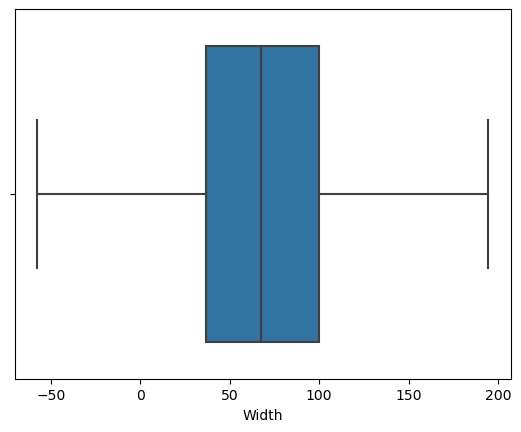

In [131]:
# cross-checking for outlier in the Width column
sns.boxplot(x = data3['Width'])

<Axes: xlabel='Width', ylabel='Count'>

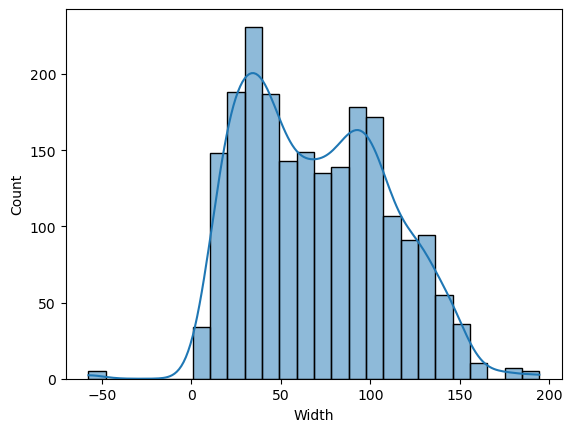

In [132]:
sns.histplot(data3['Width'], kde = True)
# outliers successfully capped

In [133]:
data3.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  27.5   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  20.1  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

<Axes: xlabel='Tendency'>

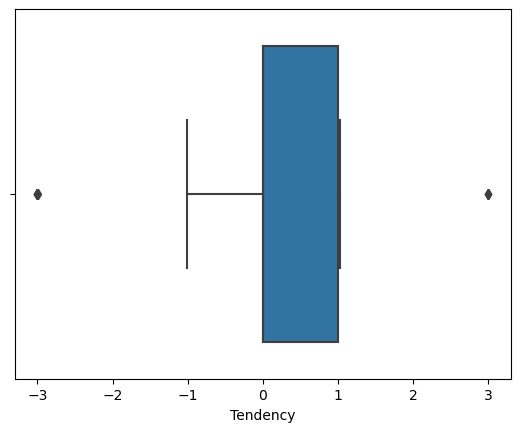

In [134]:
#Checking for outliers in the Tendency column
sns.boxplot(x = data3['Tendency'])

<Axes: xlabel='Tendency', ylabel='Count'>

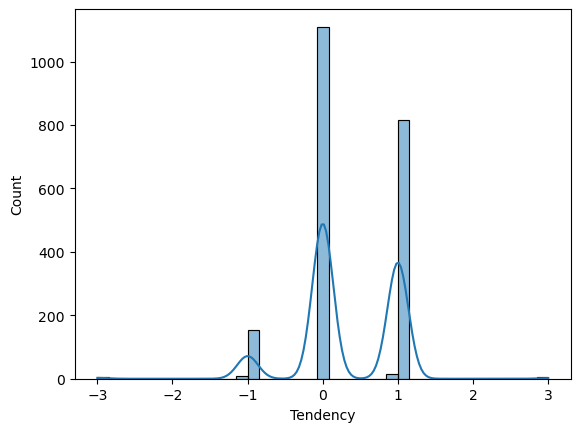

In [136]:
sns.histplot(data3['Tendency'],kde = True)

In [137]:
data3['Tendency'].skew()
# As data is not much skewed, I will use z-score method for outlier detection and removal

-0.4871051999750201

In [138]:
data3.describe()

LB           AC           FM           UC           DL  \
count  2114.000000  2114.000000  2114.000000  2114.000000  2114.000000   
mean    133.304259     0.003129     0.003527     0.004370     0.001774   
std       9.985433     0.003827     0.007531     0.003015     0.002670   
min      99.701299    -0.008418     0.000000    -0.005628    -0.004938   
25%     126.000000     0.000000     0.000000     0.001863     0.000000   
50%     133.000000     0.001634     0.000000     0.004486     0.000000   
75%     140.000000     0.005592     0.002562     0.006547     0.003298   
max     166.975984     0.014030     0.029422     0.014415     0.008230   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2114.0  2114.0  2114.000000  2114.000000  2114.000000  2114.000000   
mean      0.0     0.0    47.000692     1.305333     6.703646     8.008116   
std       0.0     0.0    17.194619     0.781778    10.377909     5.051270   
min       0.0     0.0    11.799846    -0.800000   -16.500000    -4.700000   
25%       0.0     0.0    32.000000     0.700000     0.000000     4.600000   
50%       0.0     0.0    49.000000     1.200000     0.000000     7.400000   
75%       0.0     0.0    61.000000     1.700000    11.000000    10.800000   
max       0.0     0.0    87.000000     3.200000    27.500000    20.100000   

             Width     Tendency          NSP  
count  2114.000000  2114.000000  2114.000000  
mean     70.312155     0.314078     1.302746  
std      39.602869     0.643567     0.643402  
min     -57.500000    -3.000000    -1.025988  
25%      37.000000     0.000000     1.000000  
50%      67.486468     0.000000     1.000000  
75%     100.000000     1.000000     1.000000  
max     194.500000     3.000000     5.000000

In [141]:
data3.shape

(2114, 14)

In [142]:
print("Mean value of Tendency",data3['Tendency'].mean())
print("Std value of Tendency",data3['Tendency'].std())
print("Min value of Tendency",data3['Tendency'].min())
print("Max value of Tendency",data3['Tendency'].max())

Mean value of Tendency 0.31407843195216206
Std value of Tendency 0.643567466829852
Min value of Tendency -3.0
Max value of Tendency 3.0


In [143]:
#Finding the boundary values
print("Highest allowed",data3['Tendency'].mean()+3*data3['Tendency'].std())
print("Lowest allowed",data3['Tendency'].mean()-3*data3['Tendency'].std())

Highest allowed 2.2447808324417178
Lowest allowed -1.6166239685373938


In [146]:
#Finding outliers
data3[(data3['Tendency'] > 2.2447808324417178) | (data3['Tendency'] < -1.6166239685373938)]
#This shows that there are data points beyond allowed highest and lowest value.Now we will proceed with further step of Trimming.

LB        AC        FM        UC        DL   DS   DP       ASTV  \
449   135.0  0.001233  0.002466  0.000000  0.000000  0.0  0.0  58.000000   
692   133.0  0.007740  0.029422  0.004644  0.004644  0.0  0.0  24.000000   
952   136.0  0.009506  0.000000  0.005703  0.002852  0.0  0.0  34.893135   
1039  125.0  0.000000  0.000000  0.005217  0.000000  0.0  0.0  38.000000   
1098  122.0  0.000000  0.000000  0.002516  0.000067  0.0  0.0  22.000000   
1318  125.0  0.002062  0.014433  0.006186  0.008230  0.0  0.0  18.000000   
1392  142.0  0.000000  0.000000  0.007463  0.000000  0.0  0.0  60.000000   
1595  134.0  0.000000  0.000000  0.005181  0.007772  0.0  0.0  22.000000   
1856  138.0  0.013713  0.000000  0.004219  0.000000  0.0  0.0  51.000000   
2088  133.0  0.000000  0.001236  0.006180  0.000000  0.0  0.0  79.000000   

      MSTV  ALTV       MLTV       Width  Tendency  NSP  
449    0.6  15.0   8.000000   95.000000 -3.000000  1.0  
692   -0.8   0.0  13.400000  124.994353 -3.000000  1.0  
952    1.2   0.0   7.600000   94.000000 -2.996314  1.0  
1039   0.8  18.0   6.564057   25.000000  3.000000  1.0  
1098   1.8   2.0  15.700000   35.308659 -3.000000  1.0  
1318   2.7   0.0   6.300000  125.000000 -3.000000  1.0  
1392   0.4  17.0   6.800000   21.000000  3.000000  2.0  
1595   2.1   0.0   8.053303  111.000000  3.000000  1.0  
1856   1.1   0.0   2.100000   49.000000  3.000000  1.0  
2088   0.5  27.5   3.100000   10.000000 -3.000000  1.0

In [147]:
# Trimming the selected rows above from Tendency column
data4 = data3[(data3['Tendency'] < 2.2447808324417178) & (data3['Tendency'] > -1.6166239685373938)]

In [149]:
data4.shape

(2104, 14)

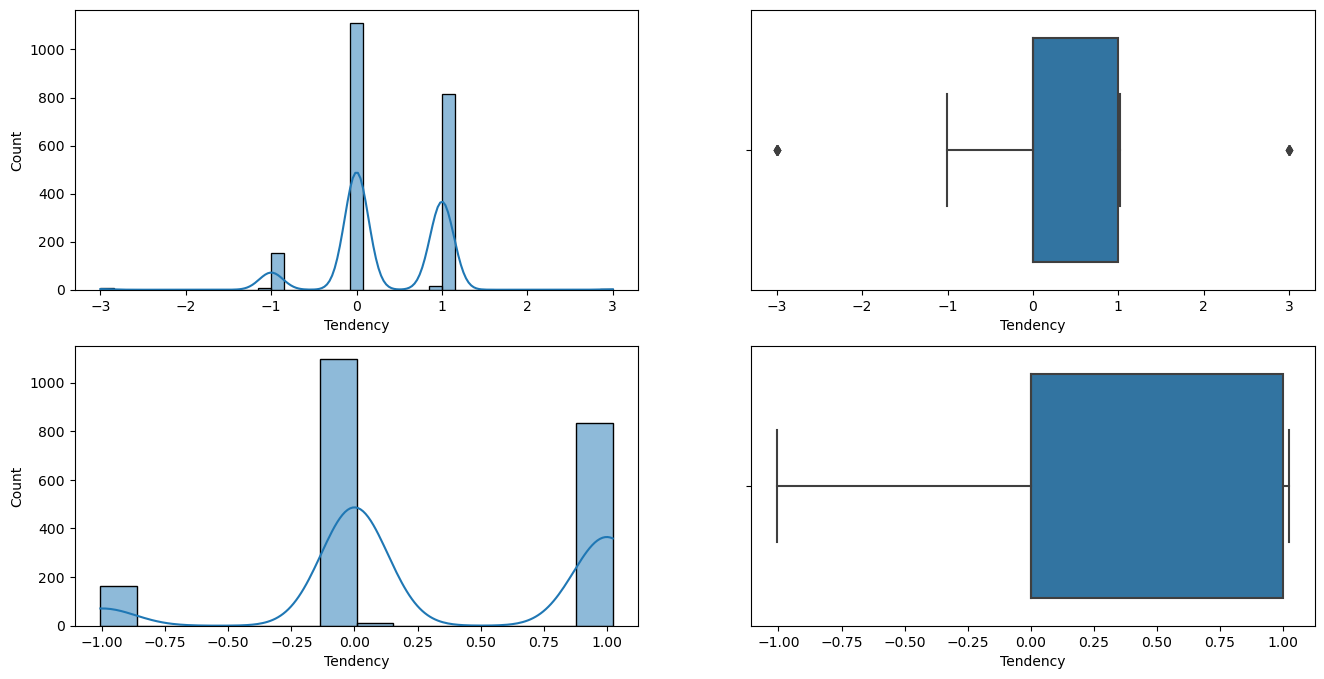

In [150]:
# Comapairing Data3 and Data4 Tendency column for changes in the outliers.
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.histplot(data3['Tendency'], kde = True)

plt.subplot(2,2,2)
sns.boxplot(x = data3['Tendency'])

plt.subplot(2,2,3)
sns.histplot(data4['Tendency'], kde = True)

plt.subplot(2,2,4)
sns.boxplot(x = data4['Tendency'])

plt.show()

#comparison clearly shows that outliers has been removed.

In [151]:
data4.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  27.5   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  20.1  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

<Axes: xlabel='NSP'>

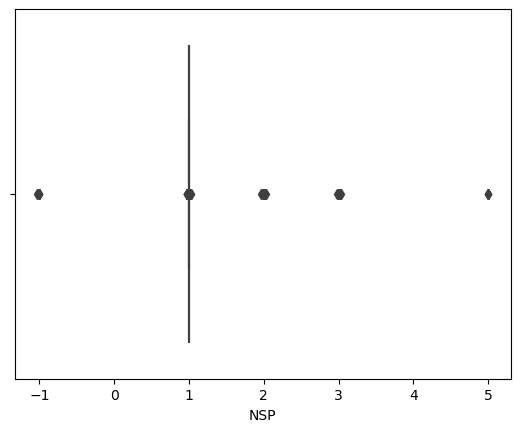

In [152]:
# Checking for outliers in the NSP column
sns.boxplot(x= data4['NSP'])

<Axes: xlabel='NSP', ylabel='Count'>

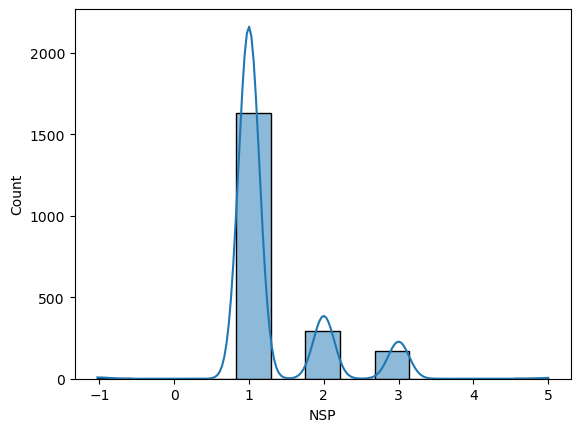

In [153]:
sns.histplot(data4['NSP'], kde = True)

In [154]:
data4['NSP'].skew()

1.8157076760371211

In [161]:
# This column is highly sensitive so we will use percentile method here.
# Detecting Outliers
upper_limit_NSP = data4['NSP'].quantile(0.99)
lower_limit_NSP = data4['NSP'].quantile(0.01)
print("lower limit",lower_limit_NSP)
print("upper limit",upper_limit_NSP)

lower limit 0.9892650273294318
upper limit 3.0


In [159]:
# Filtering outliers greater than upper limit
data4[(data4['NSP']) >= 3.0]

LB        AC        FM        UC        DL   DS   DP  ASTV  MSTV  \
5     134.0  0.001116  0.000000  0.010493  0.008230  0.0  0.0  26.0   3.2   
7     122.0  0.000000  0.000000  0.000000  0.000000  0.0  0.0  83.0   0.5   
8     122.0  0.014030  0.000000  0.001517  0.000000  0.0  0.0  84.0   0.5   
9     122.0  0.000000  0.000000  0.002967  0.000000  0.0  0.0  86.0   0.3   
20    129.0  0.000000  0.029422  0.004474  0.002237  0.0  0.0  30.0   2.1   
...     ...       ...       ...       ...       ...  ...  ...   ...   ...   
2036  128.0  0.000000  0.002014  0.007049  0.005035  0.0  0.0  65.0   2.6   
2037  128.0  0.000000  0.001470  0.006955  0.004646  0.0  0.0  66.0   2.7   
2038  128.0  0.000000  0.001850  0.007401  0.005550  0.0  0.0  65.0   2.5   
2039  128.0  0.000000  0.002500  0.006667  0.005833  0.0  0.0  65.0   2.5   
2048  128.0  0.000000  0.000000  0.008032  0.008230  0.0  0.0  63.0   3.2   

      ALTV  MLTV       Width  Tendency  NSP  
5      0.0   0.0  150.000000       0.0  3.0  
7      6.0  15.6   69.920261       1.0  3.0  
8      5.0  13.6   68.000000       1.0  3.0  
9      6.0  10.6   68.000000       1.0  3.0  
20     0.0   8.5  128.000000       0.0  3.0  
...    ...   ...         ...       ...  ...  
2036   0.0   0.0  129.000000       0.0  3.0  
2037   0.0   0.0  129.000000       0.0  3.0  
2038   0.0   0.0  129.000000       0.0  3.0  
2039   0.0   0.0  129.000000       0.0  3.0  
2048   0.0   0.0   90.000000       0.0  3.0  

[175 rows x 14 columns]

In [162]:
# Filtering outliers less than lower limit
data4[(data4['NSP']) <= 0.9892650273294318]

LB        AC        FM        UC        DL   DS   DP       ASTV  \
6     134.000000  0.001403  0.000000  0.012623  0.008230  0.0  0.0  29.000000   
381   129.000000  0.009174  0.029422  0.002502  0.000000  0.0  0.0  41.000000   
382   131.000000  0.012195  0.029422  0.002710  0.000000  0.0  0.0  37.000000   
501   131.000000  0.014030  0.017403  0.001339  0.000000  0.0  0.0  31.000000   
594   148.000000  0.001668  0.004170  0.003336  0.000000  0.0  0.0  77.000000   
681   140.000000 -0.008418  0.003191  0.004255  0.000000  0.0  0.0  34.000000   
788   123.000000  0.003188  0.003188  0.000000  0.000000  0.0  0.0  52.000000   
858   142.000000  0.000000  0.000000  0.004717  0.000000  0.0  0.0  40.839959   
875   135.000000  0.002384  0.000000  0.004768  0.000000  0.0  0.0  42.000000   
924   122.000000  0.005038  0.000000  0.003778  0.002519  0.0  0.0  31.000000   
1073  136.000000  0.005848  0.000000  0.005848  0.002924  0.0  0.0  35.701844   
1160  127.000000  0.010989  0.000109  0.010073  0.000916  0.0  0.0  24.000000   
1286  112.000000  0.002946  0.000000  0.004418  0.000000  0.0  0.0  26.000000   
1304  138.000000  0.000000  0.000000  0.006696  0.002232  0.0  0.0  34.000000   
1313  125.000000  0.007048  0.007048  0.005286  0.007048  0.0  0.0  21.000000   
1383  121.000000  0.000000  0.000000  0.007937  0.007937  0.0  0.0  28.000000   
1425  143.615776  0.003958  0.000000  0.001319  0.001319  0.0  0.0  40.000000   
1507  130.000000  0.000000  0.000000  0.005310  0.000000  0.0  0.0  53.000000   
1517  130.000000  0.001224  0.000000  0.006063  0.000000  0.0  0.0  41.000000   
1646  130.000000  0.008040  0.001005  0.006030  0.005025  0.0  0.0  52.000000   
1700  137.000000  0.007607  0.001166  0.004841  0.003458  0.0  0.0  58.000000   
1804  143.000000  0.000000  0.000000  0.001887  0.000000  0.0  0.0  68.000000   

      MSTV       ALTV  MLTV       Width  Tendency       NSP  
6      3.2   0.000000   0.0  150.000000       0.0 -1.025988  
381    1.1   0.000000  -4.7  135.000000       0.0 -1.000000  
382    1.4   0.000000   3.7  135.000000       0.0 -1.000000  
501    3.2   0.777728   7.1  133.000000       1.0  0.975440  
594    0.5   3.000000   9.6   32.000000       0.0  0.981226  
681    2.9   0.000000  20.1  114.000000       1.0  0.984834  
788    0.8   3.000000  14.3   77.000000       1.0  0.979738  
858    0.8   0.000000  12.6   31.858038       1.0  0.988393  
875    0.8   7.000000   8.5   34.000000       0.0  0.987498  
924    1.2   0.000000   6.7   57.000000       1.0  0.989006  
1073   1.2  12.000000   5.8   79.000000       1.0 -1.000000  
1160   1.5   0.000000   1.7   67.000000       0.0  0.981460  
1286   1.2   1.000000   8.4   54.000000       0.0  0.972305  
1304   1.0   6.000000  10.5   56.000000       1.0  0.967075  
1313   2.3   0.000000   4.3  107.000000       0.0  0.984792  
1383   1.4   0.000000   5.7   67.000000       1.0 -1.000000  
1425   0.9   5.000000   8.3   97.000000       1.0  0.978174  
1507   0.5  27.500000   5.9   20.000000       1.0  0.969447  
1517   0.8  13.000000   9.9   42.000000       0.0  0.979280  
1646   1.7   0.000000   0.3  101.000000       0.0 -1.000000  
1700   1.4   0.000000   4.7  109.000000       1.0  0.989257  
1804   0.3   5.056449   9.4   23.000000       0.0  0.988399

In [163]:
# Capping the outliers with upper and lower limit
data4['NSP'] = np.where(
    data4['NSP'] > upper_limit_NSP, upper_limit_NSP,
    np.where(
        data4['NSP'] < lower_limit_NSP, lower_limit_NSP,
        data4['NSP']  # Use the original data from 'NSP' column
    )
)

C:\Users\singh\AppData\Local\Temp\ipykernel_16076\4235604004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['NSP'] = np.where(


<Axes: xlabel='NSP'>

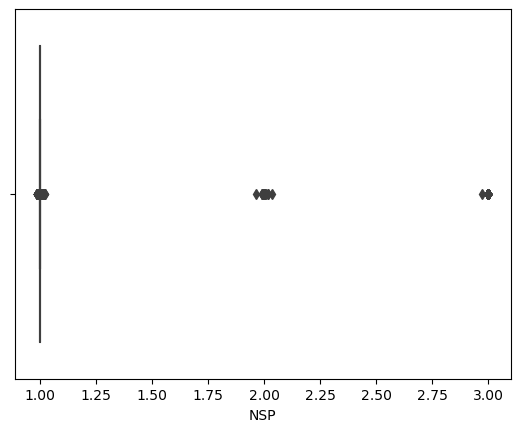

In [164]:
# cross-checking for outliers
sns.boxplot(x = data4['NSP'])

<Axes: xlabel='NSP', ylabel='Count'>

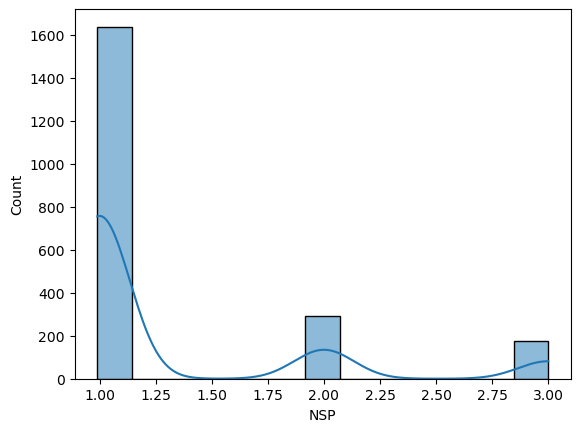

In [166]:
sns.histplot(data4['NSP'],kde = True)
# As per percentile method we have treated the data while preserving the data structure.# 

<Axes: >

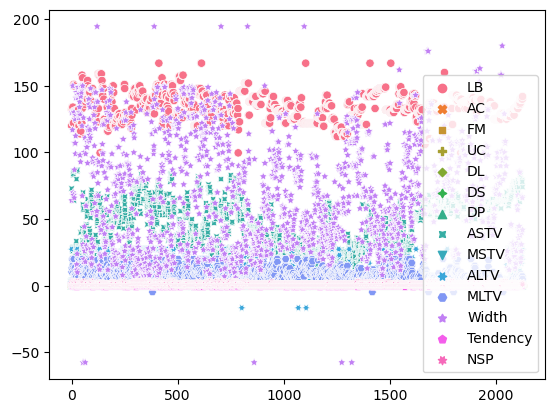

In [167]:
# As data is cleaned . Now I check for correlation between each column using scatterplot
sns.scatterplot(data4)

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x800 with 0 Axes>

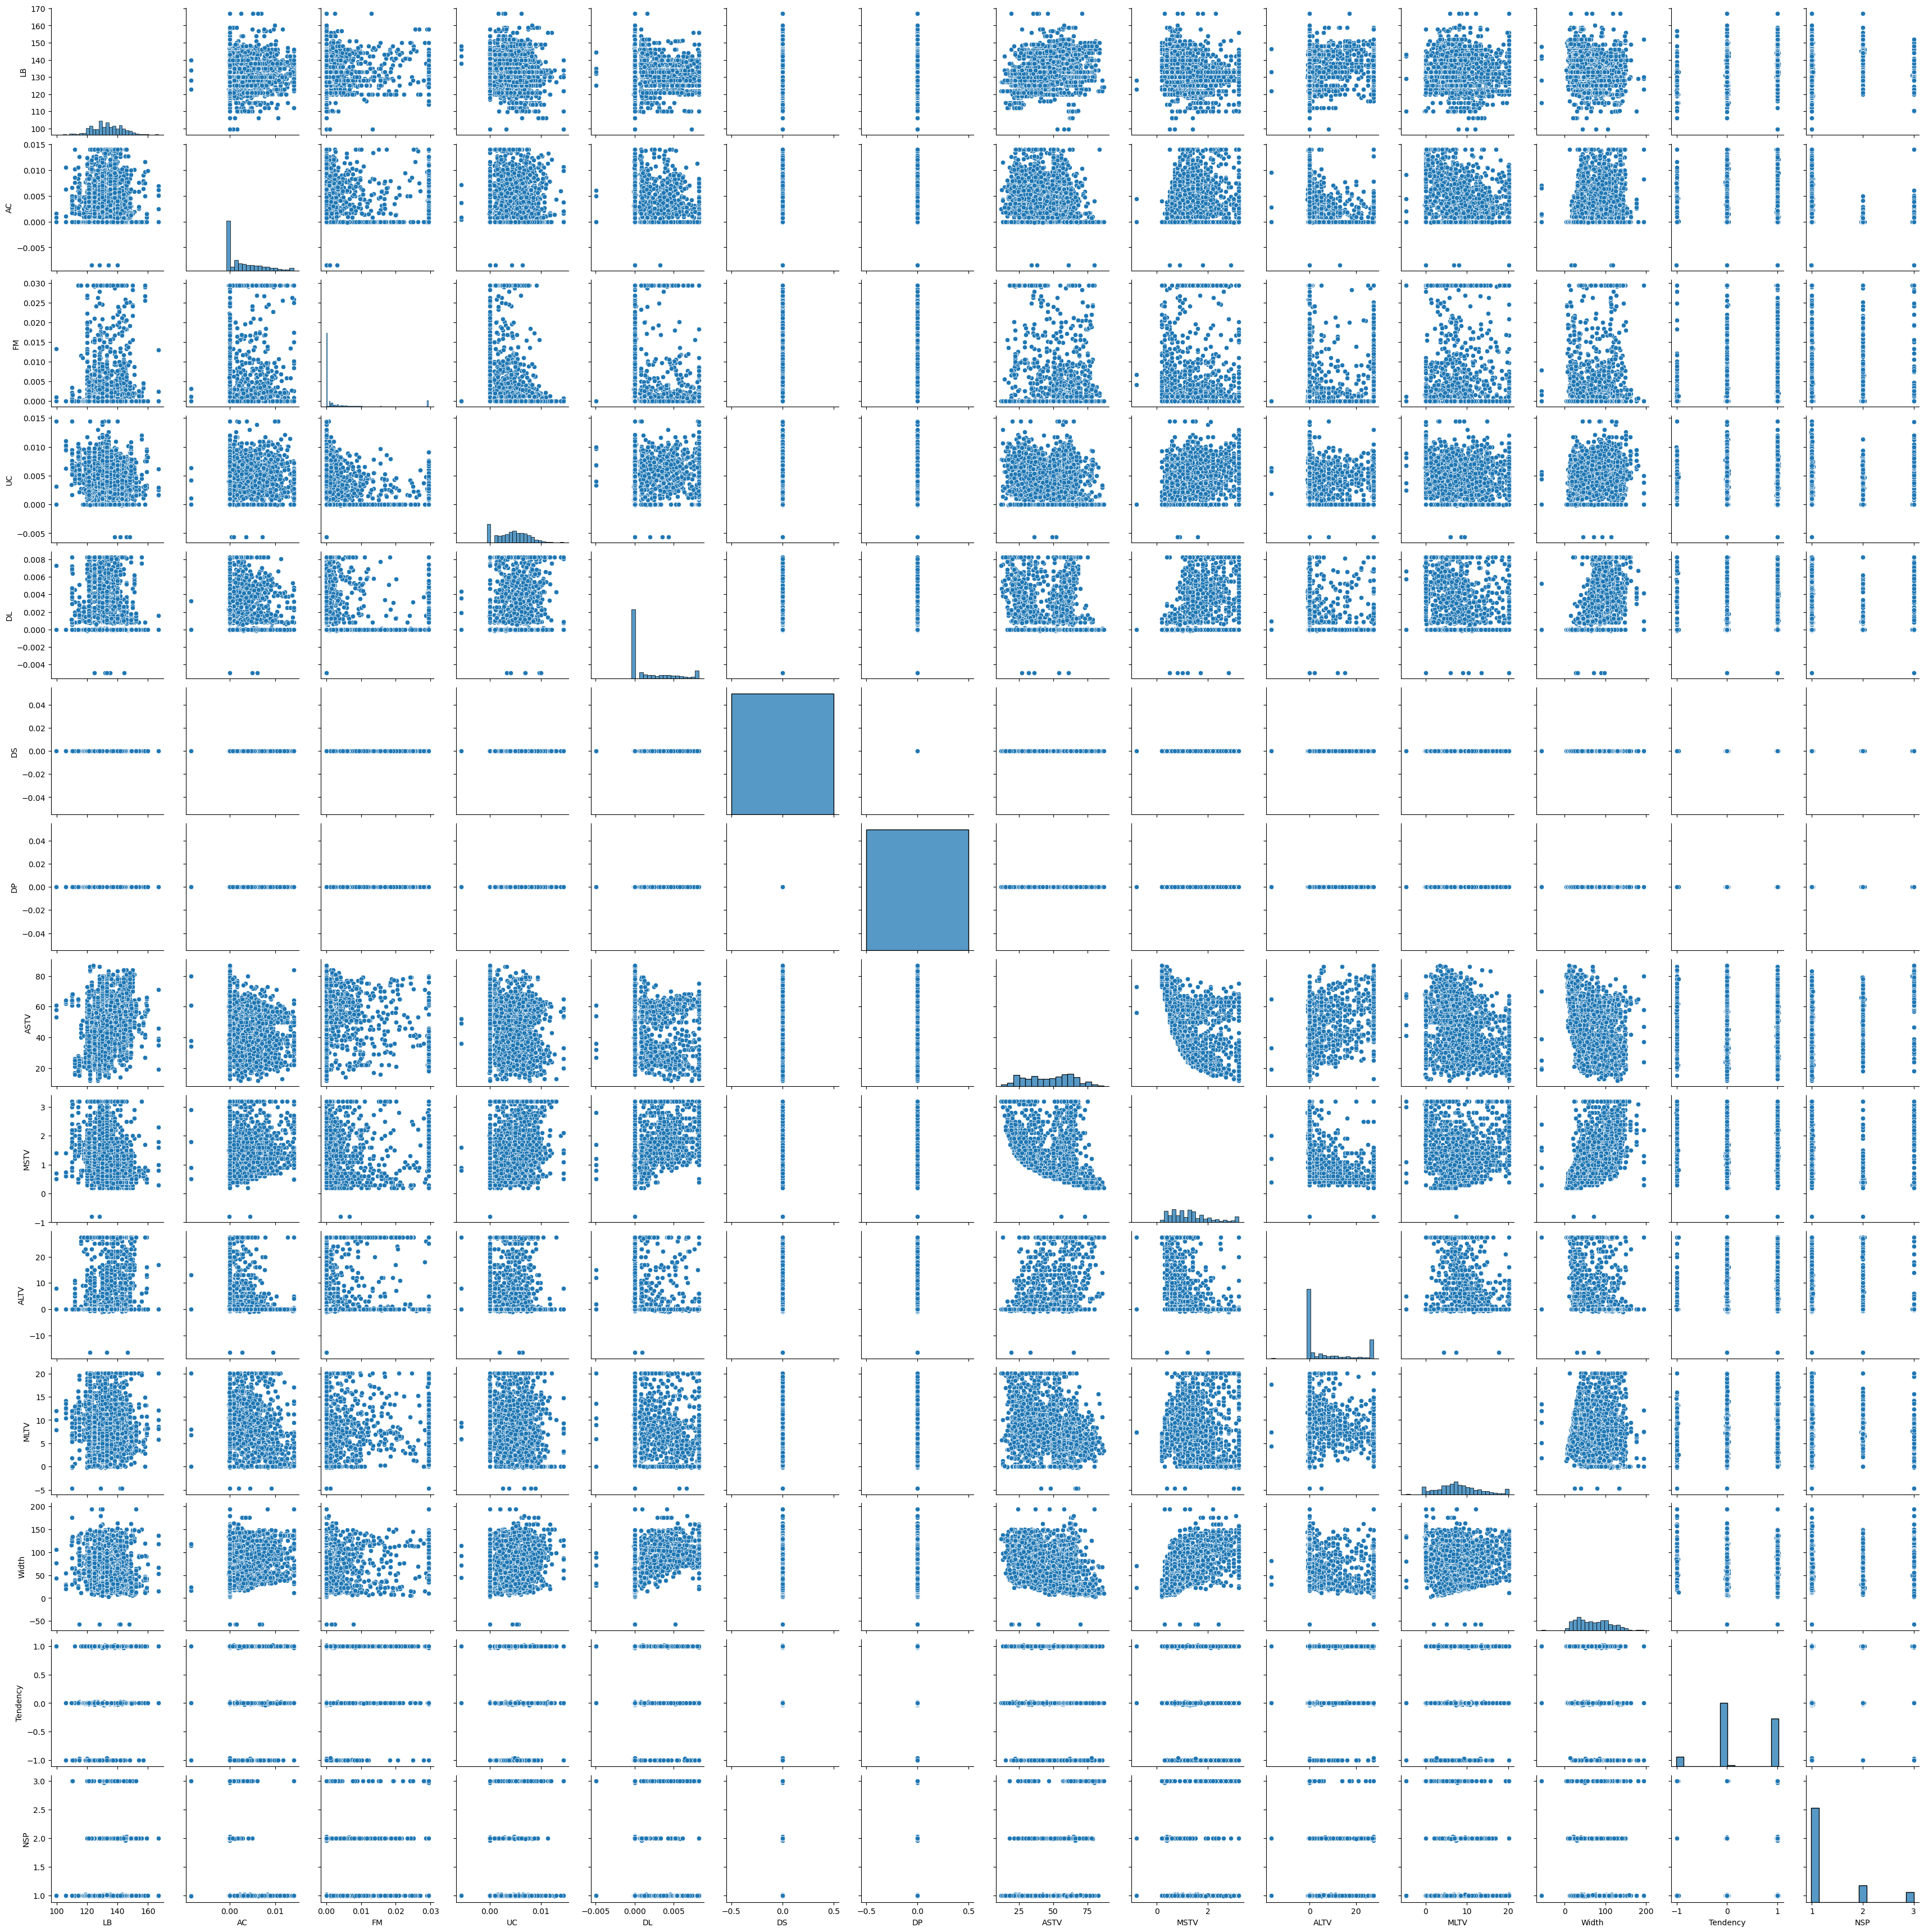

In [172]:
plt.figure(figsize=(16,8))
sns.pairplot(data4)
plt.show()

# Upon reading this plot it shows that most of the column shows relationship with each other. As pattern represents relationshp each column shows some kind of pattern with every other column.
# As this is biological data , it seems true as in biology every factor is influenced by other.